In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
path_revision = 'Revision'

In [3]:
def get_tables_openmp(base_path, report_name):
    res = []

    for i in range(1,5):
        index = pow(2, i)
        res.append(pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt').to_numpy())
    
    return res

In [4]:
def get_tables_TBB(base_path, report_name):
    return pd.read_csv(base_path + '/TBB/' + report_name + '.txt').to_numpy() 

In [5]:
def get_table_sequential(base_path, report_name):
    return pd.read_csv(base_path + '/Sequential/' + report_name + '.txt').to_numpy() 

In [6]:
def create_row(seq, open, idx, idy):
    tmp_row = [seq[idx, idy]]

    for i in range(4):
        tmp_row.append(open[i][idx, idy])
    
    return tmp_row

In [7]:
tbb_revision = get_tables_TBB(path_revision, 'report_Synthetic_Graph')
sequential_revision = get_table_sequential(path_revision, 'report_Synthetic_Graph')
openMP_revision = get_tables_openmp(path_revision, 'report_Synthetic_Graph')

In [8]:
print('Block Nodes,K,Sequential [ms],2 [%],4 [%],8 [%],16 [%],TBB [%]')

for i in range(0, 13, 4):
    for k in range(0, 8, 2):
        final_str = str(int(sequential_revision[(i+2)*8+k,0])) + ',' + str(int(sequential_revision[(i+2)*8 + k, 1])) + ',' + str(round(sequential_revision[(i+2)*8 + k, 5] * 100) / 100)

        for j in range(4):
            final_str = final_str + ',' + str(round((sequential_revision[(i+2)*8 + k, 5] - openMP_revision[j][(i+2)*8 + k, 5]) / sequential_revision[(i+2)*8 + k, 5] * 100 * 100) / 100)
        
        final_str = final_str + ',' + str(round((sequential_revision[(i+2)*8 + k, 5] - tbb_revision[(i+2)*8 + k, 5]) / sequential_revision[(i+2)*8 + k, 5] * 100 * 100) / 100)

        print(final_str)

Block Nodes,K,Sequential [ms],2 [%],4 [%],8 [%],16 [%],TBB [%]
380,64,0.41,-2.21,-0.66,1.15,-25.09,-7.16
380,256,0.57,6.13,12.32,15.05,-2.3,8.6
380,1024,1.24,19.32,30.22,36.71,29.32,34.15
380,4096,4.59,33.04,51.49,58.13,53.69,58.39
6140,64,6.61,-1.25,0.65,0.99,-2.82,-4.42
6140,256,7.48,3.1,7.38,9.16,6.87,8.14
6140,1024,14.55,22.49,37.71,46.53,46.05,47.82
6140,4096,43.53,37.07,58.46,68.52,71.23,72.01
98300,64,180.0,-0.56,2.23,1.97,0.95,0.9
98300,256,194.16,-0.82,5.24,7.66,6.44,6.11
98300,1024,286.93,14.19,27.18,31.67,32.46,32.48
98300,4096,714.2,33.19,54.46,63.55,66.18,66.83
1572860,64,3852.03,1.19,1.33,1.44,0.61,1.22
1572860,256,4154.94,3.23,5.18,5.56,4.78,4.76
1572860,1024,5963.6,17.51,24.73,26.06,24.52,24.27
1572860,4096,13139.7,32.53,48.79,52.25,49.82,49.91


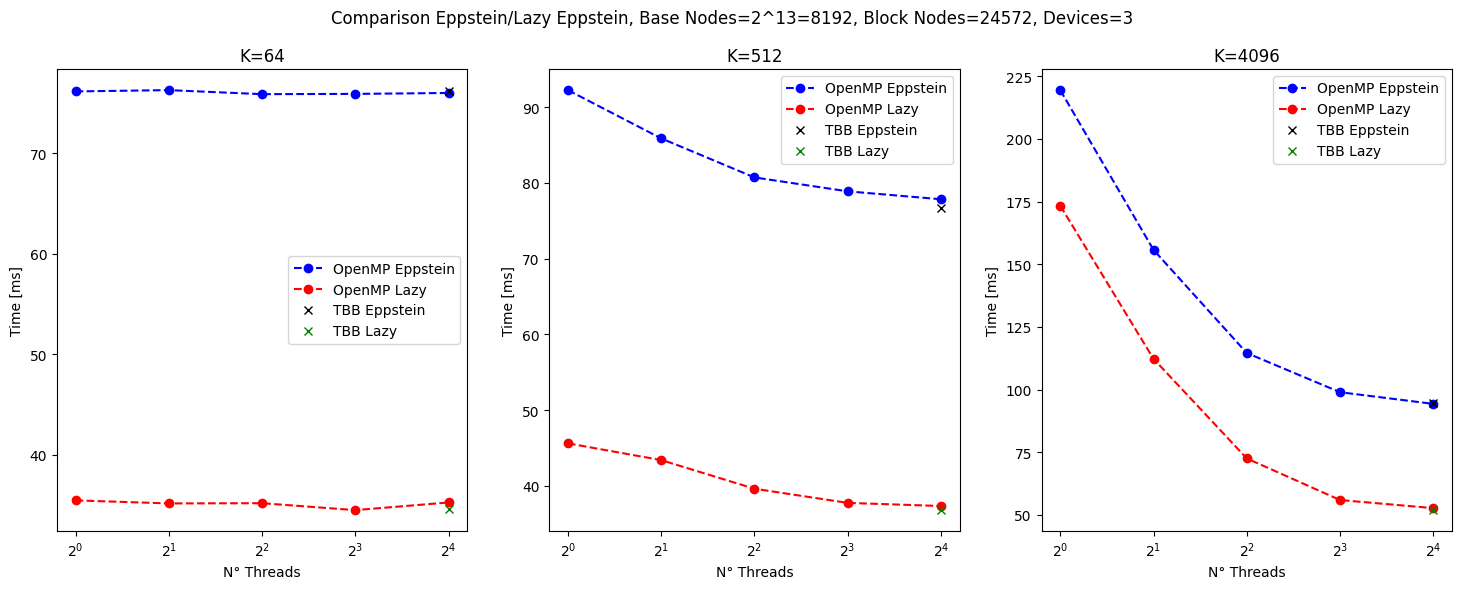

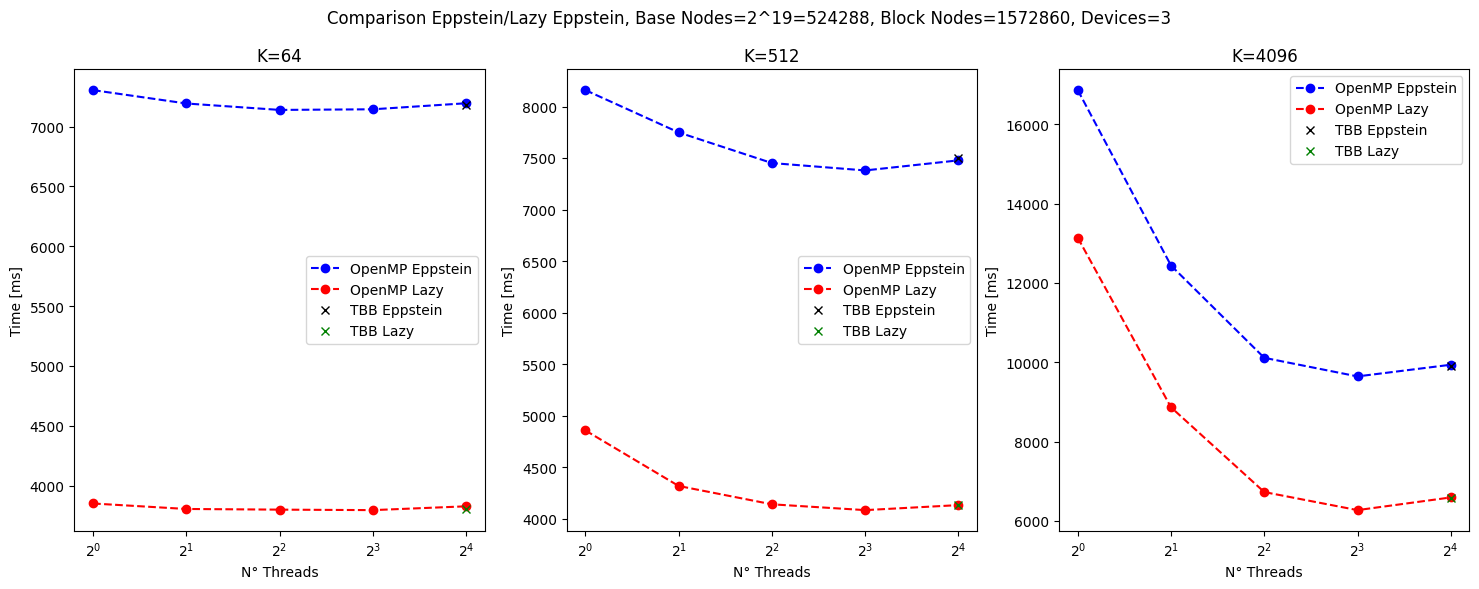

In [9]:
for i in range(6, 13, 6):
    fix, axs = plt.subplots(1, 3, figsize=(18, 6))
    fix.suptitle('Comparison Eppstein/Lazy Eppstein, Base Nodes=2^' + str(i+7) + '=' + str(pow(2,i+7)) + ", Block Nodes=" + str((pow(2,i+7)-2)*3+2) + ', Devices=3')

    for j, ax in enumerate(axs.flat):
        ax.set_title('K=' + str(int(sequential_revision[3*j + (i+2)*8, 1])))

        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, 3*j + (i+2)*8, 3), '--bo')
        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, 3*j + (i+2)*8, 5), '--ro')
        ax.plot(16, tbb_revision[3*j + (i+2)*8, 3], 'kx')
        ax.plot(16, tbb_revision[3*j + (i+2)*8, 5], 'gx')
        ax.legend(['OpenMP Eppstein', 'OpenMP Lazy', 'TBB Eppstein', 'TBB Lazy'], loc='best')

        ax.set_xlabel('N° Threads')
        ax.set_ylabel('Time [ms]') 

        ax.set_xscale('log', base=2)

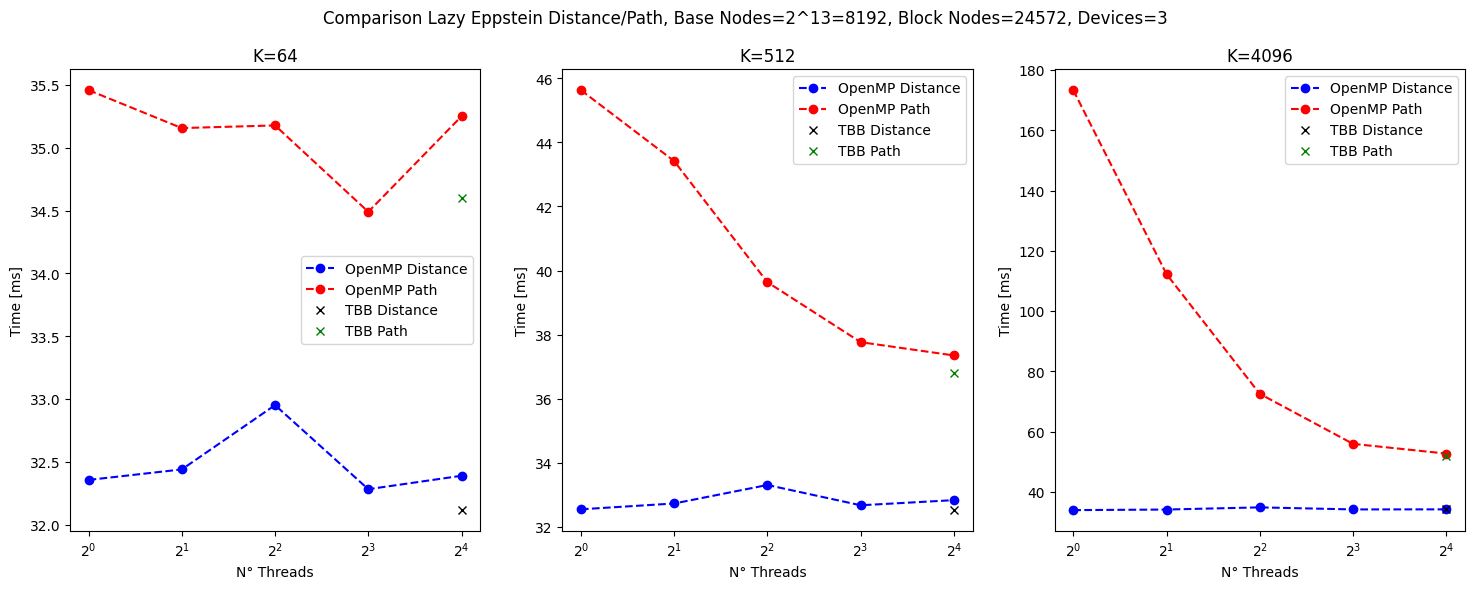

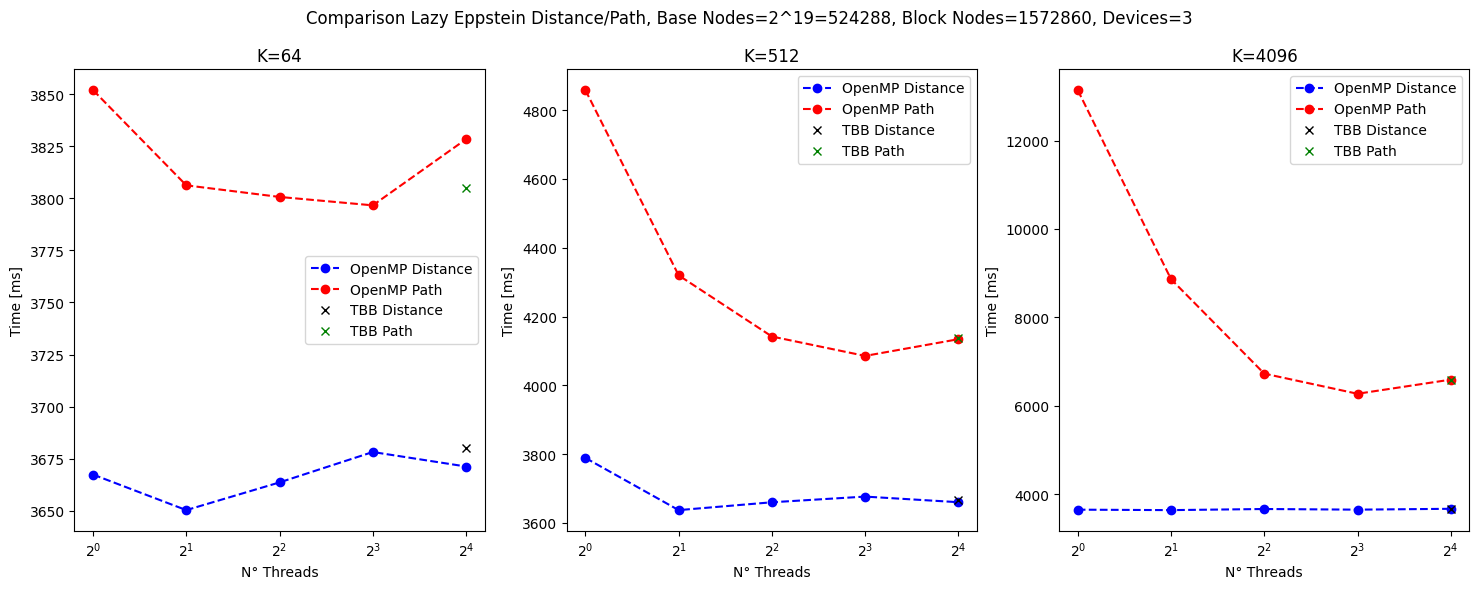

In [10]:
for i in range(6, 13, 6):
    fix, axs = plt.subplots(1, 3, figsize=(18, 6))
    fix.suptitle('Comparison Lazy Eppstein Distance/Path, Base Nodes=2^' + str(i+7) + '=' + str(pow(2,i+7)) + ", Block Nodes=" + str((pow(2,i+7)-2)*3+2) + ', Devices=3')

    for j, ax in enumerate(axs.flat):
        ax.set_title('K=' + str(int(sequential_revision[3*j + (i+2)*8, 1])))

        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, 3*j + (i+2)*8, 4), '--bo')
        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, 3*j + (i+2)*8, 5), '--ro')
        ax.plot(16, tbb_revision[3*j + (i+2)*8, 4], 'kx')
        ax.plot(16, tbb_revision[3*j + (i+2)*8, 5], 'gx')

        ax.set_xlabel('N° Threads')
        ax.set_ylabel('Time [ms]') 

        ax.legend(['OpenMP Distance', 'OpenMP Path', 'TBB Distance', 'TBB Path'], loc='best')
        ax.set_xscale('log', base=2)

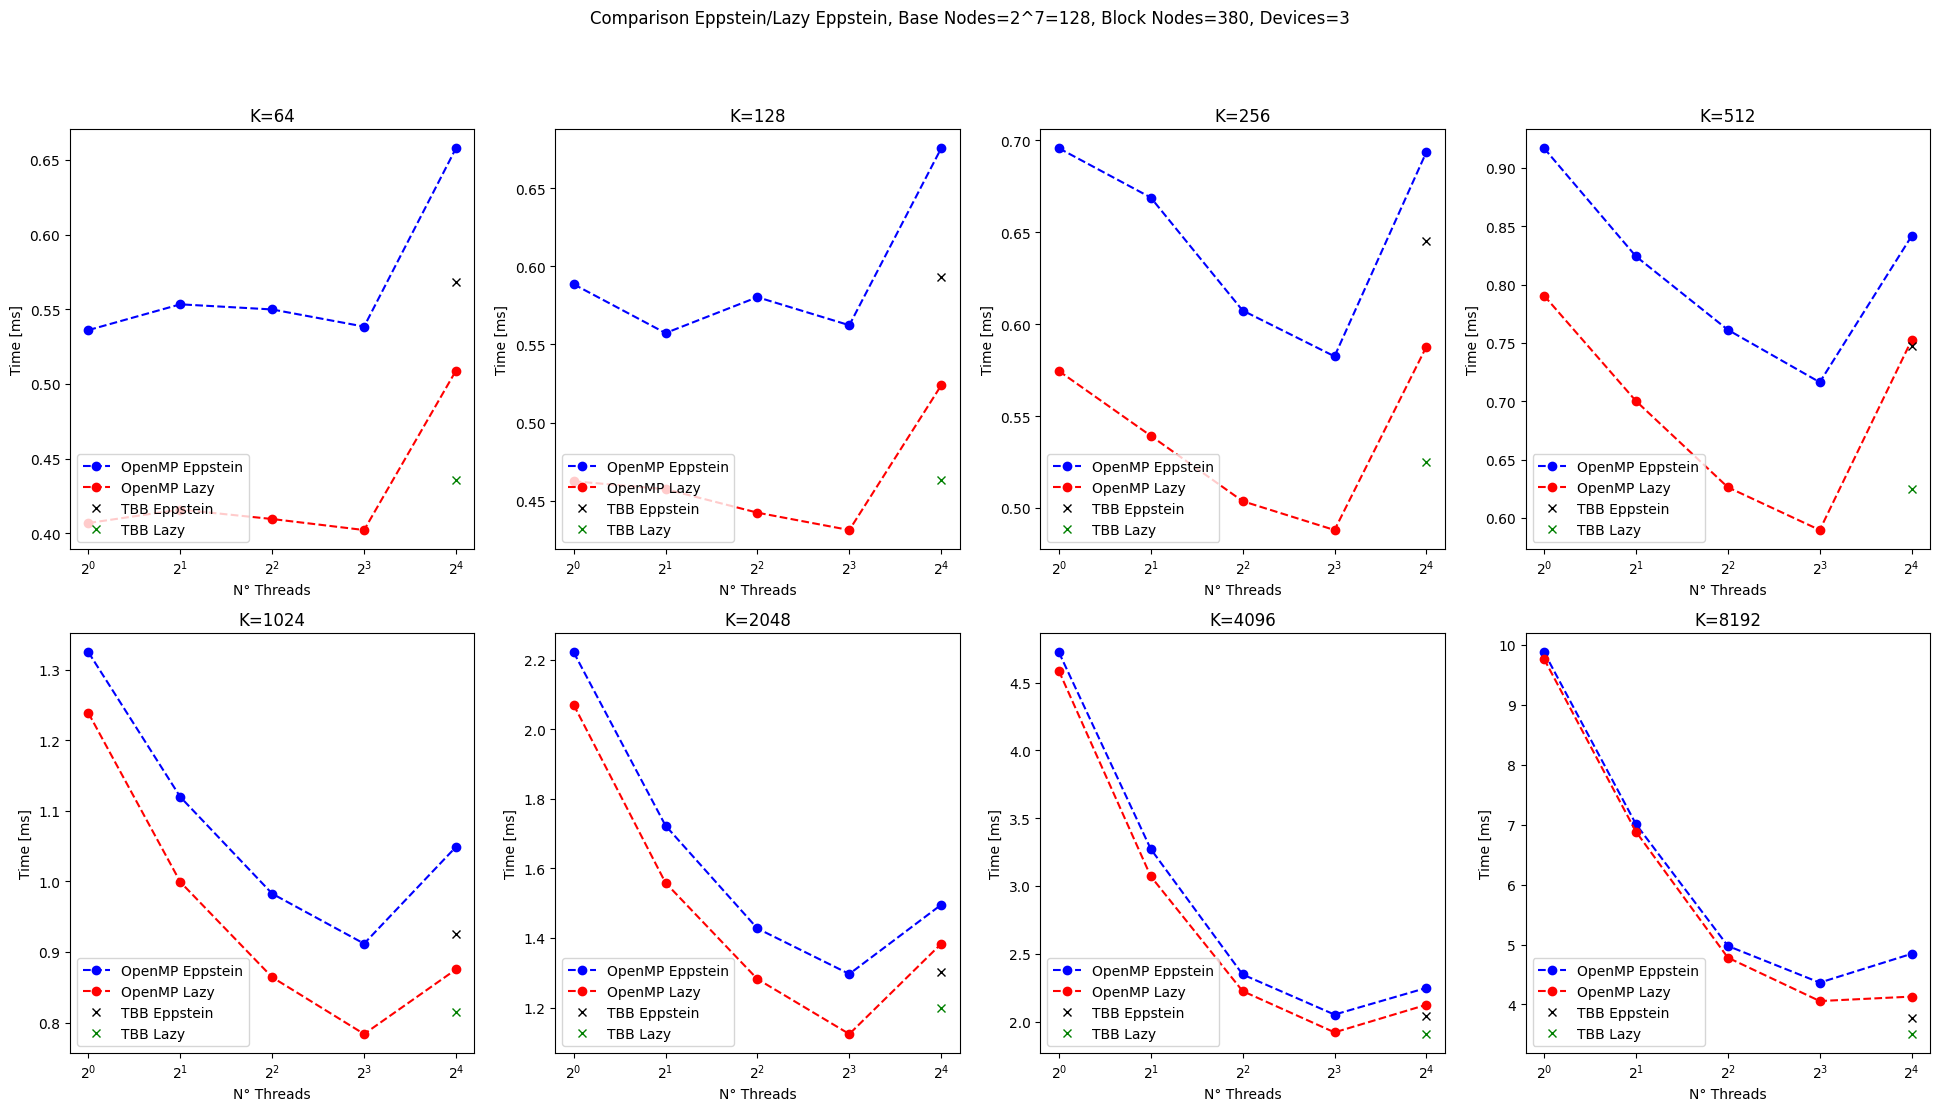

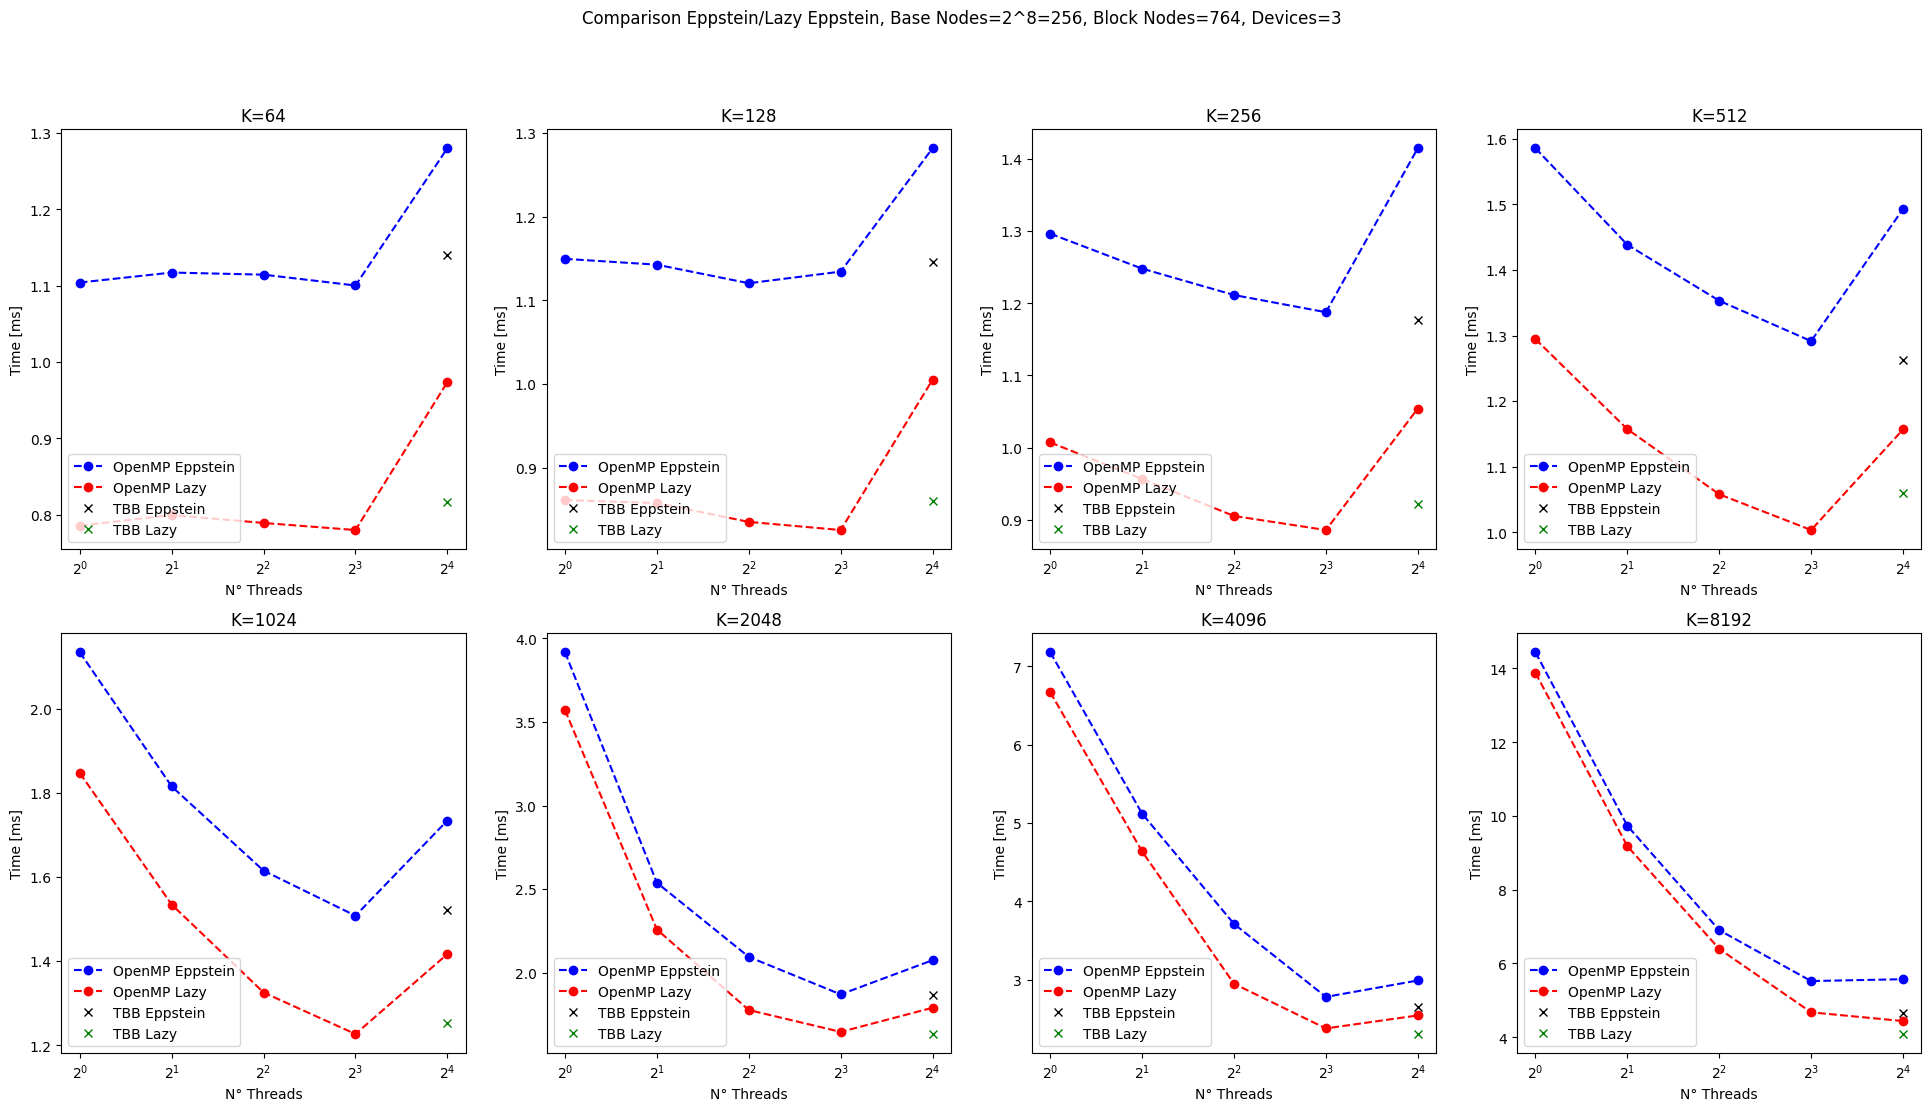

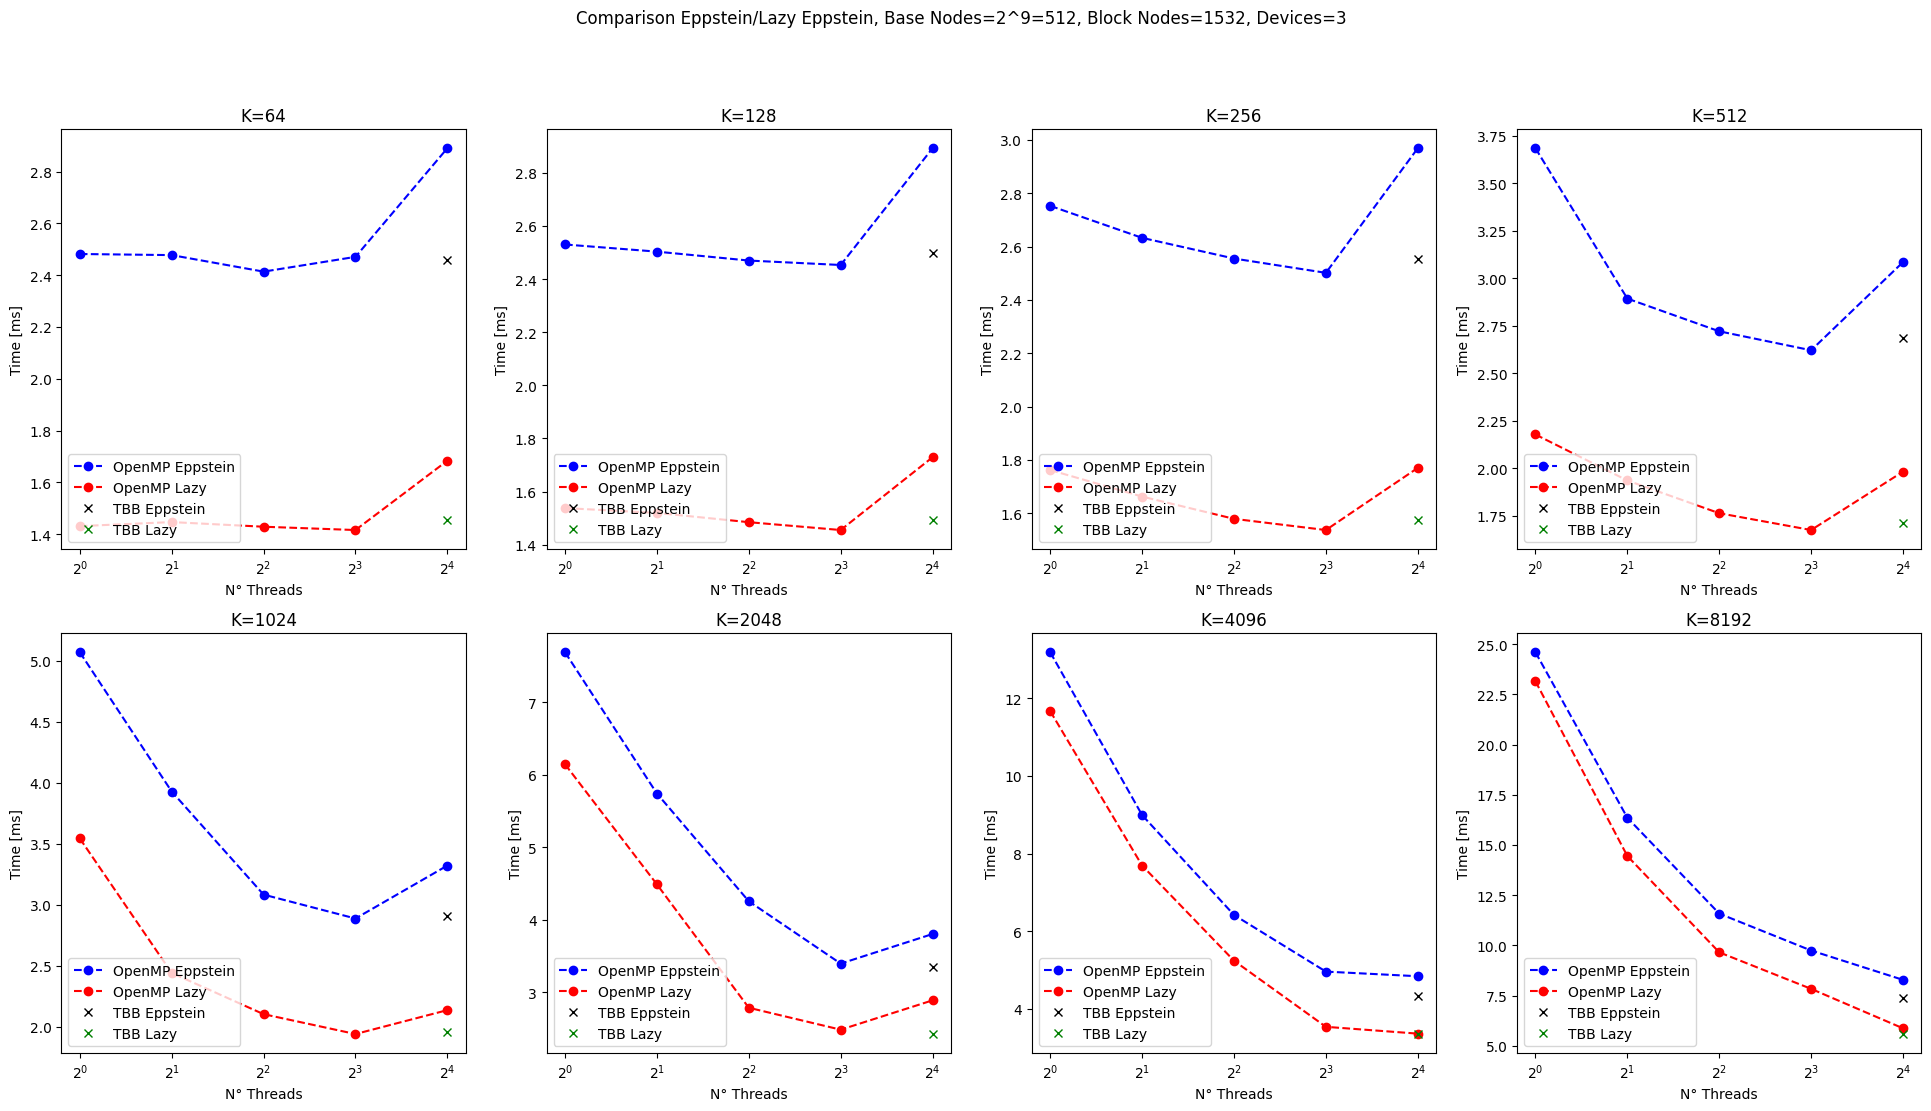

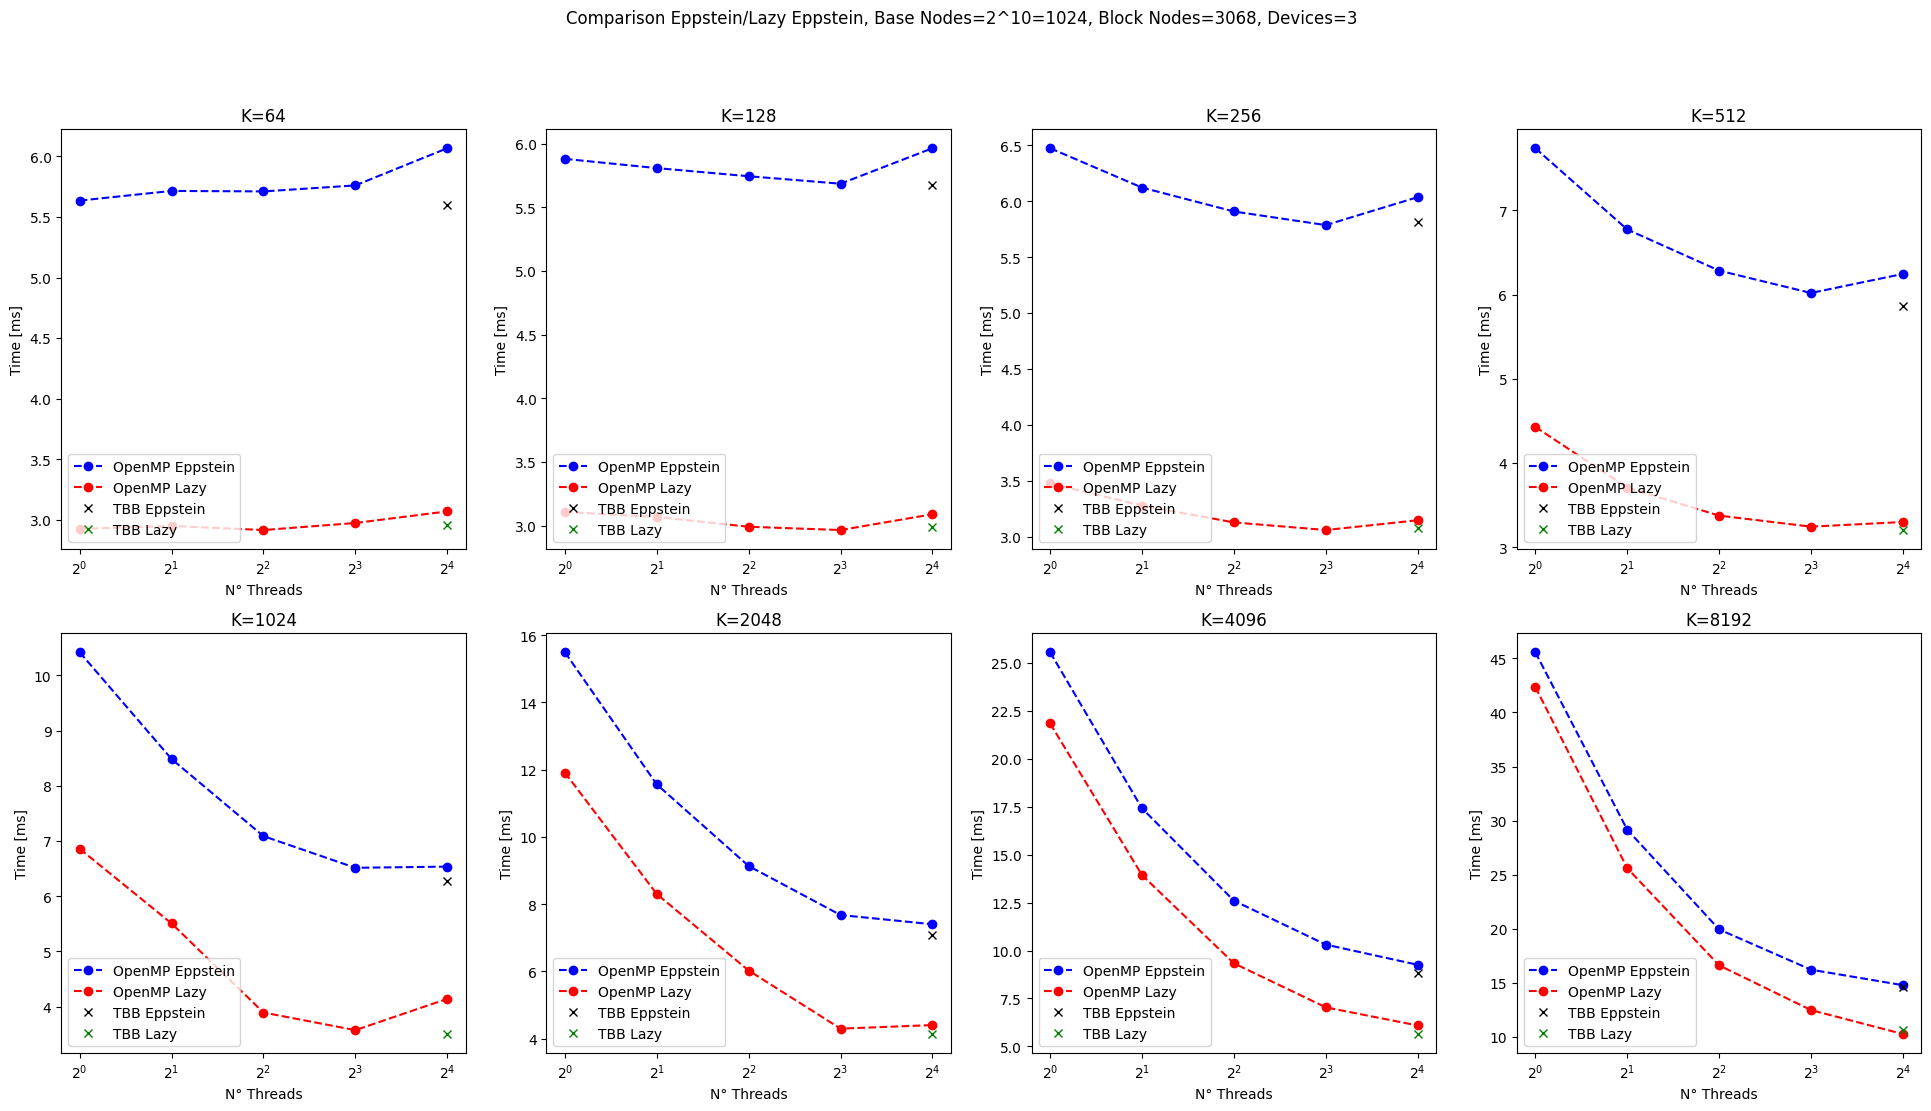

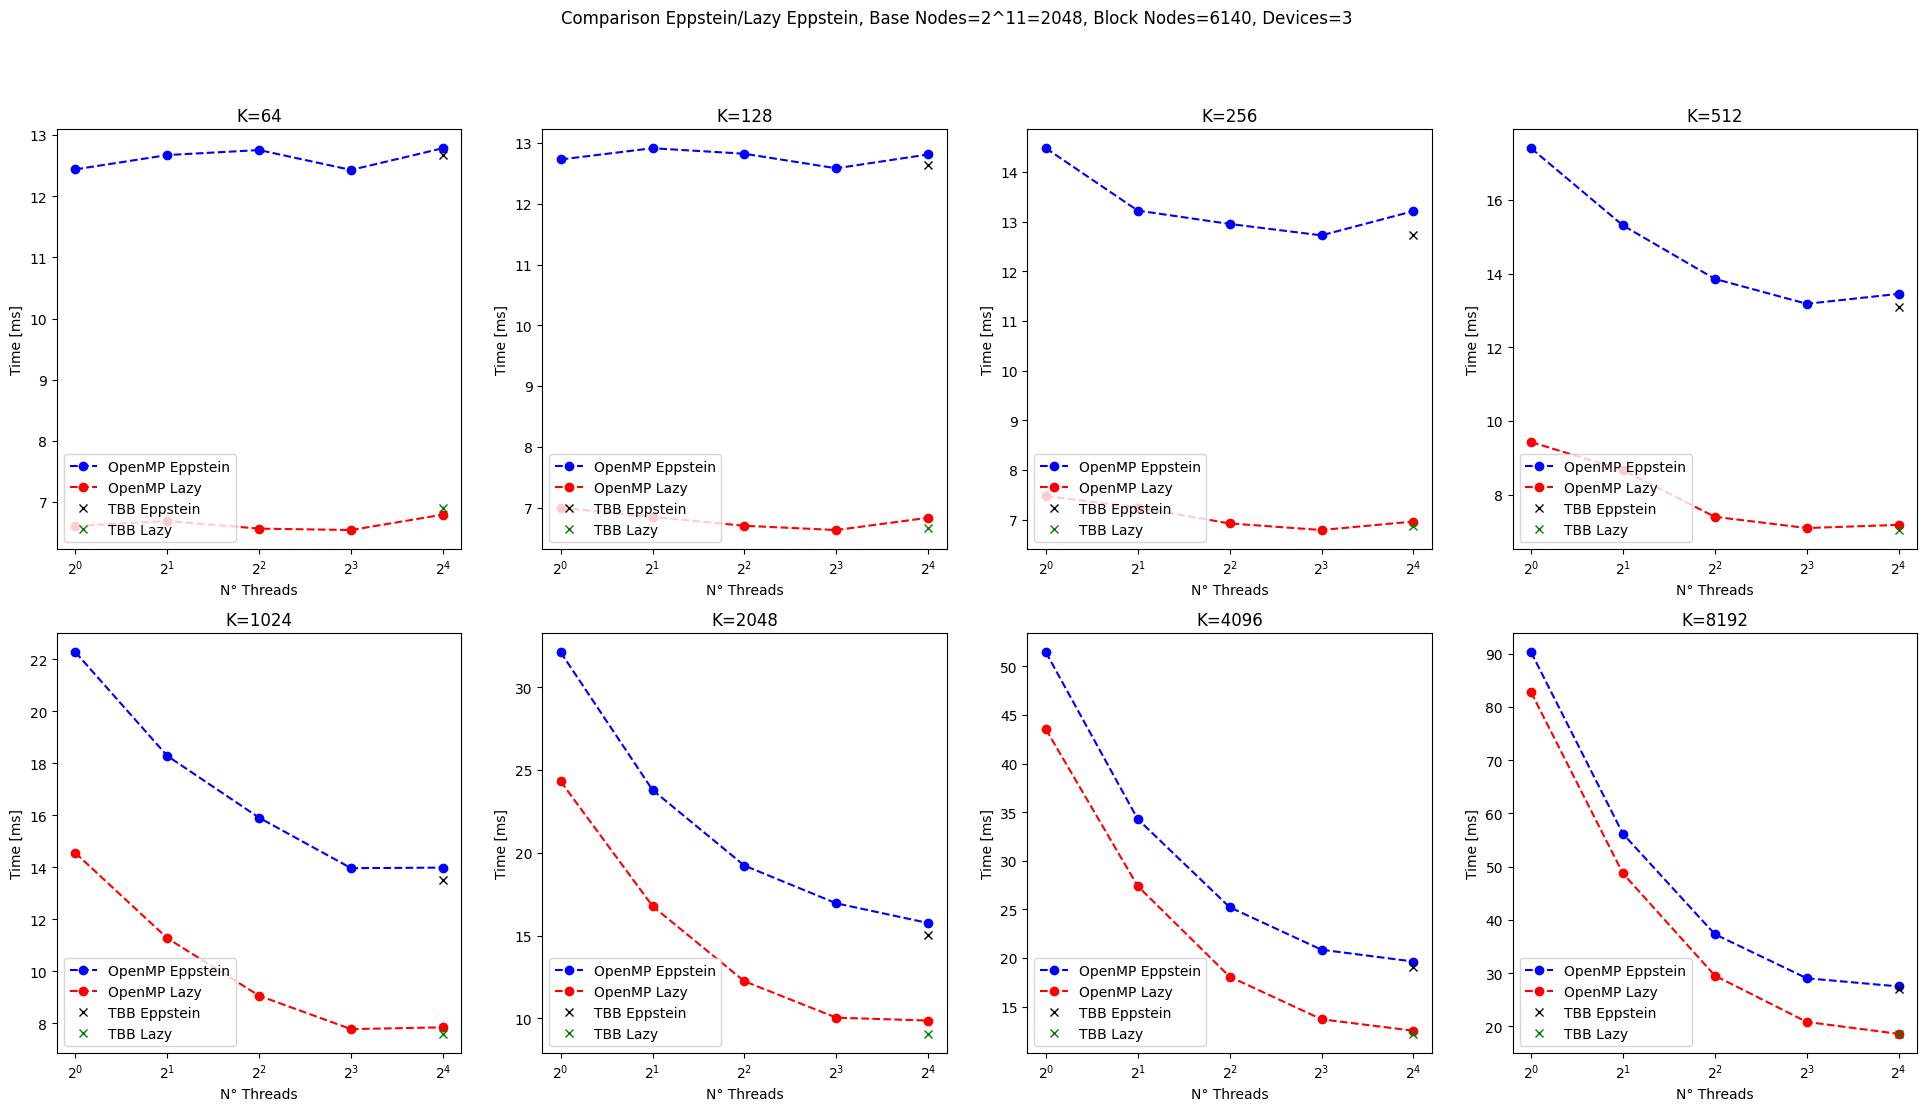

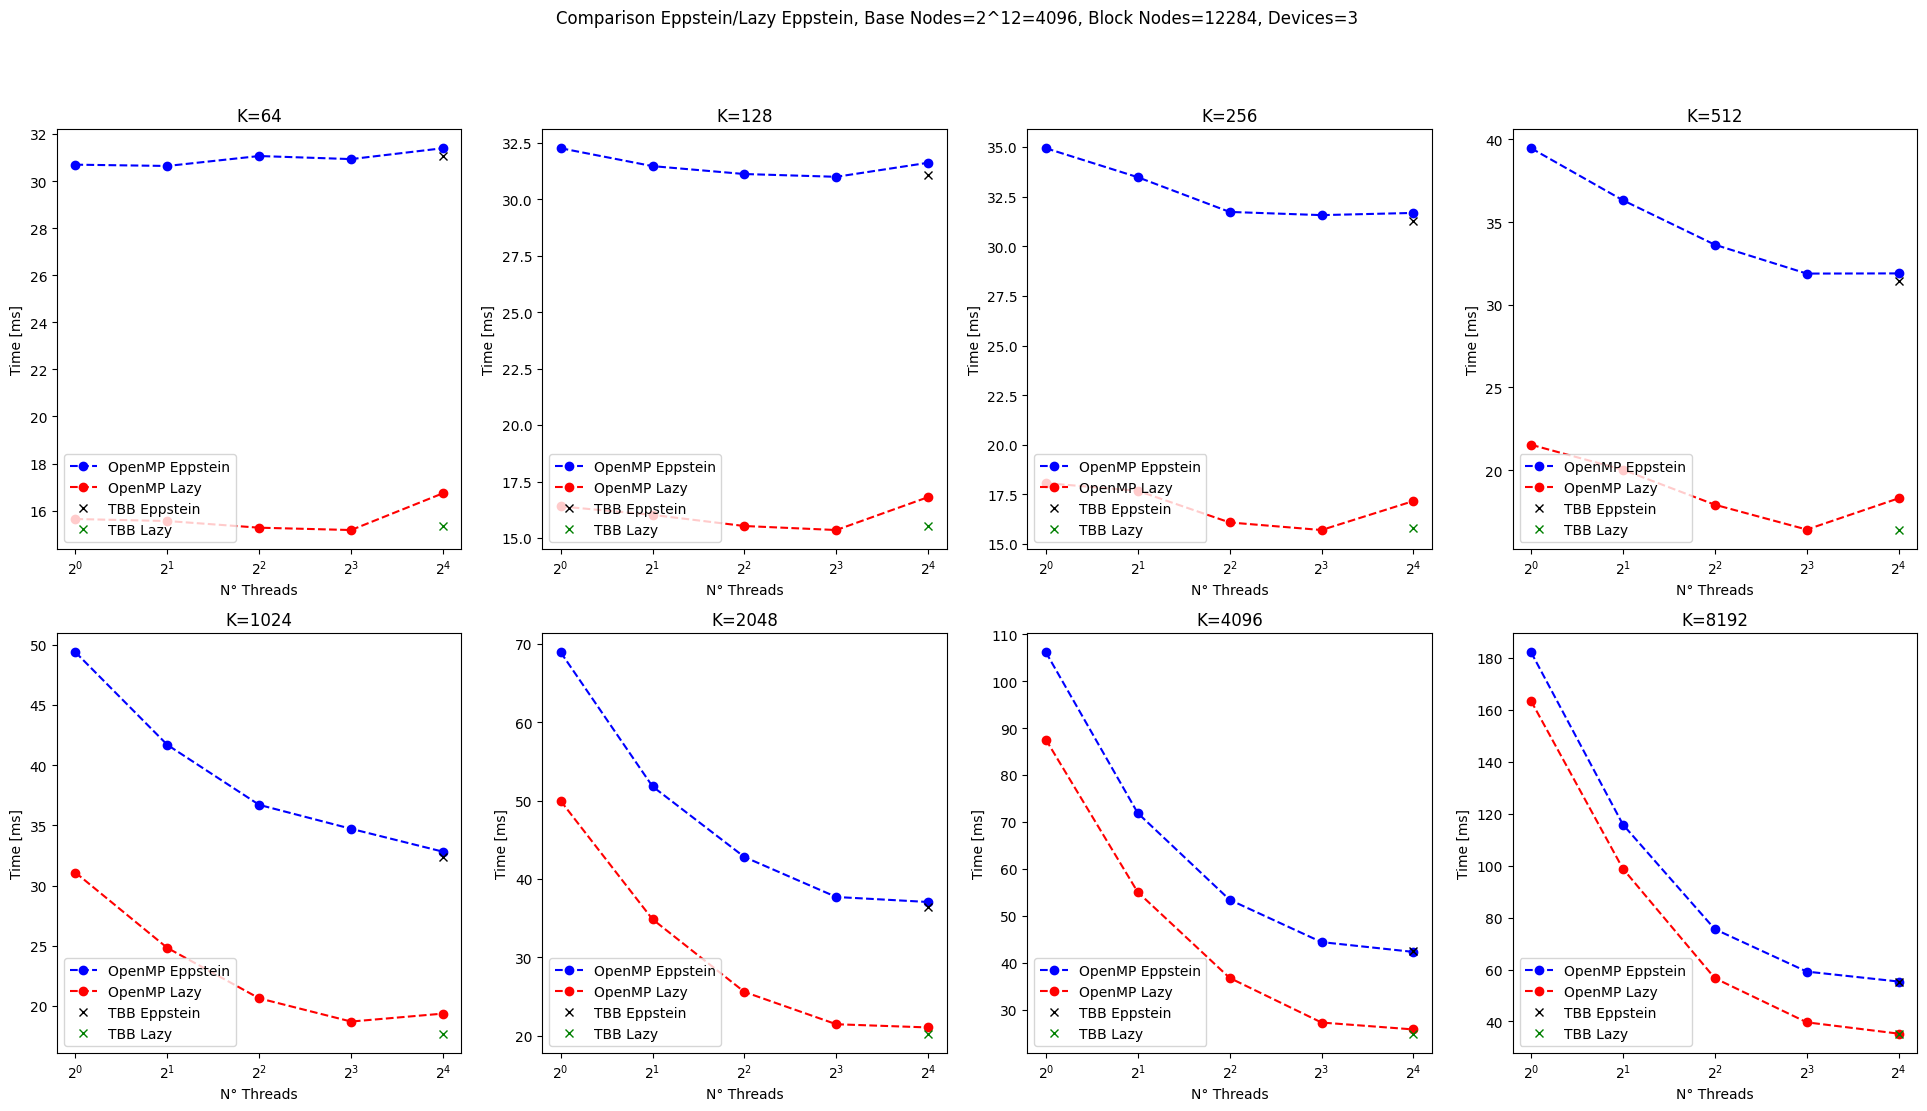

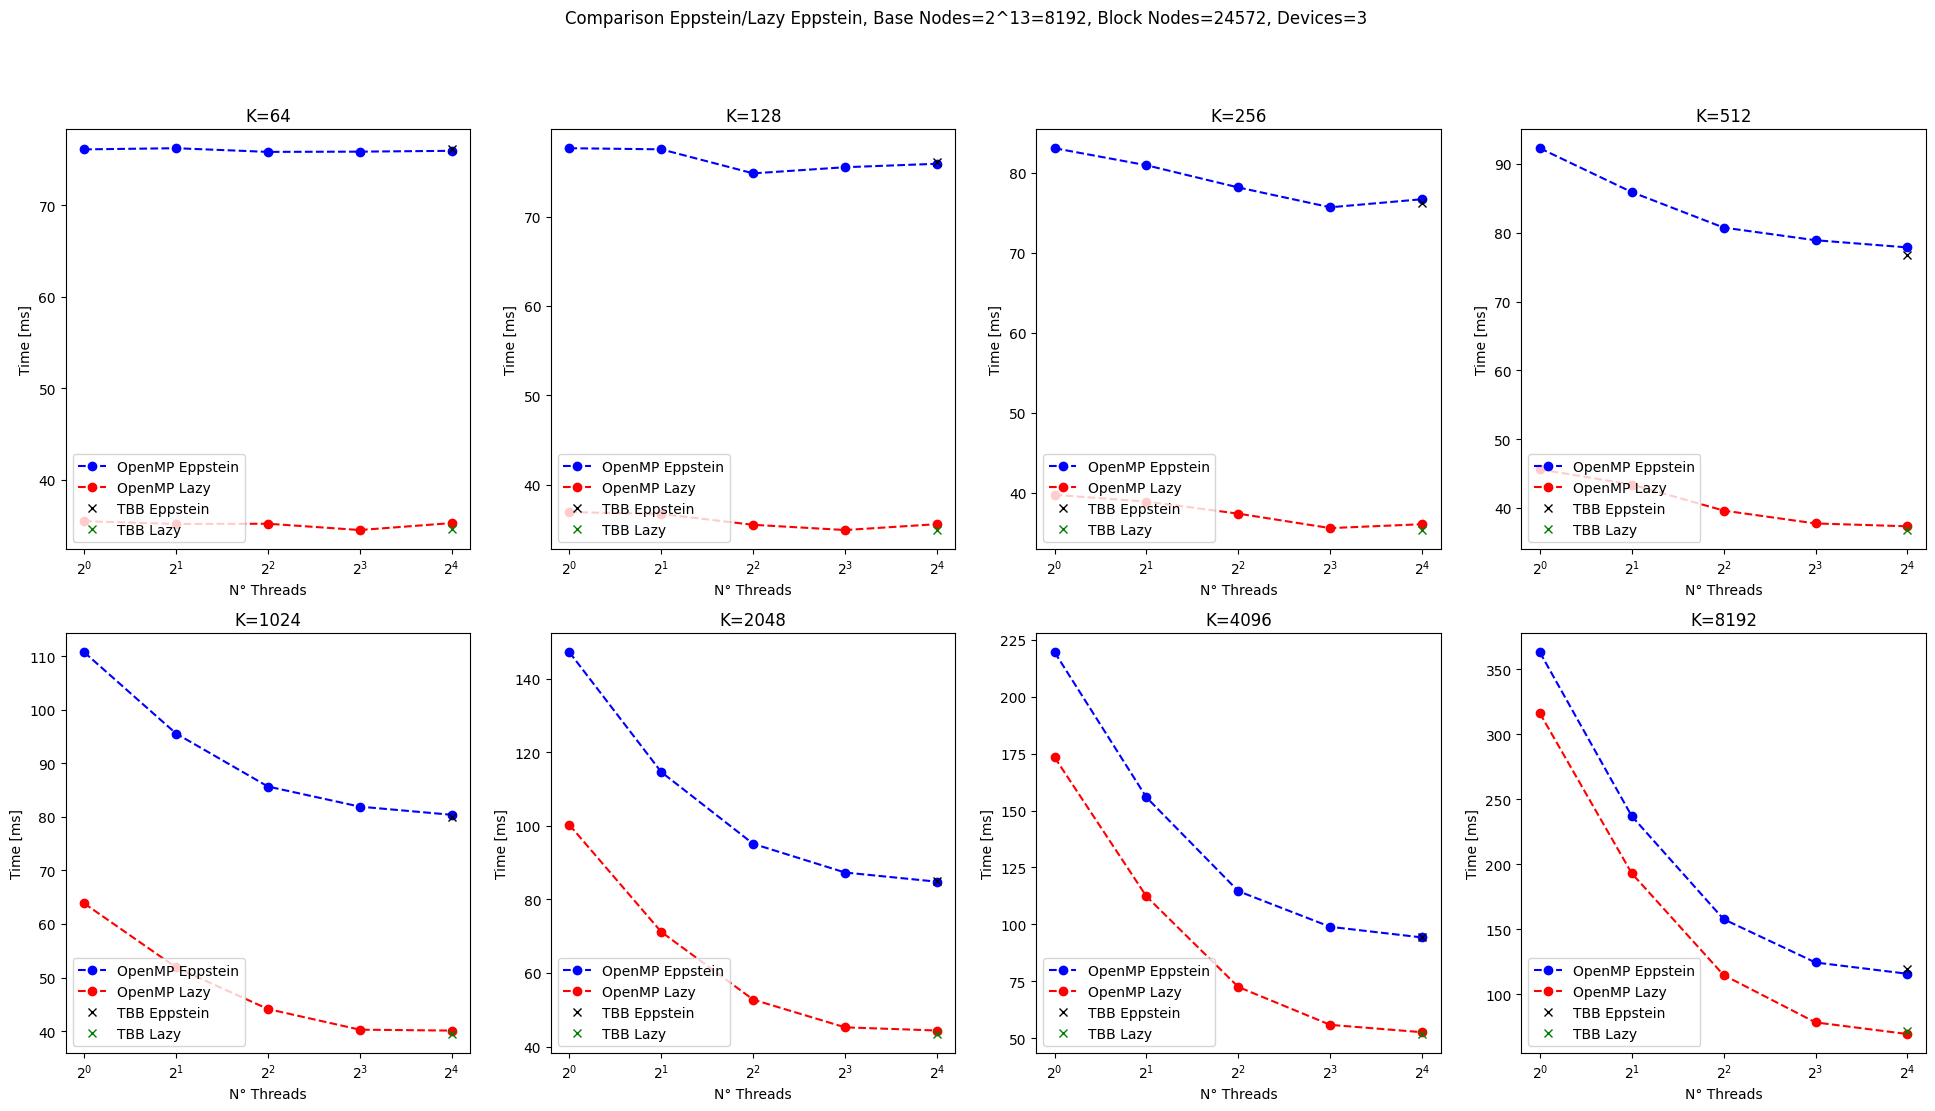

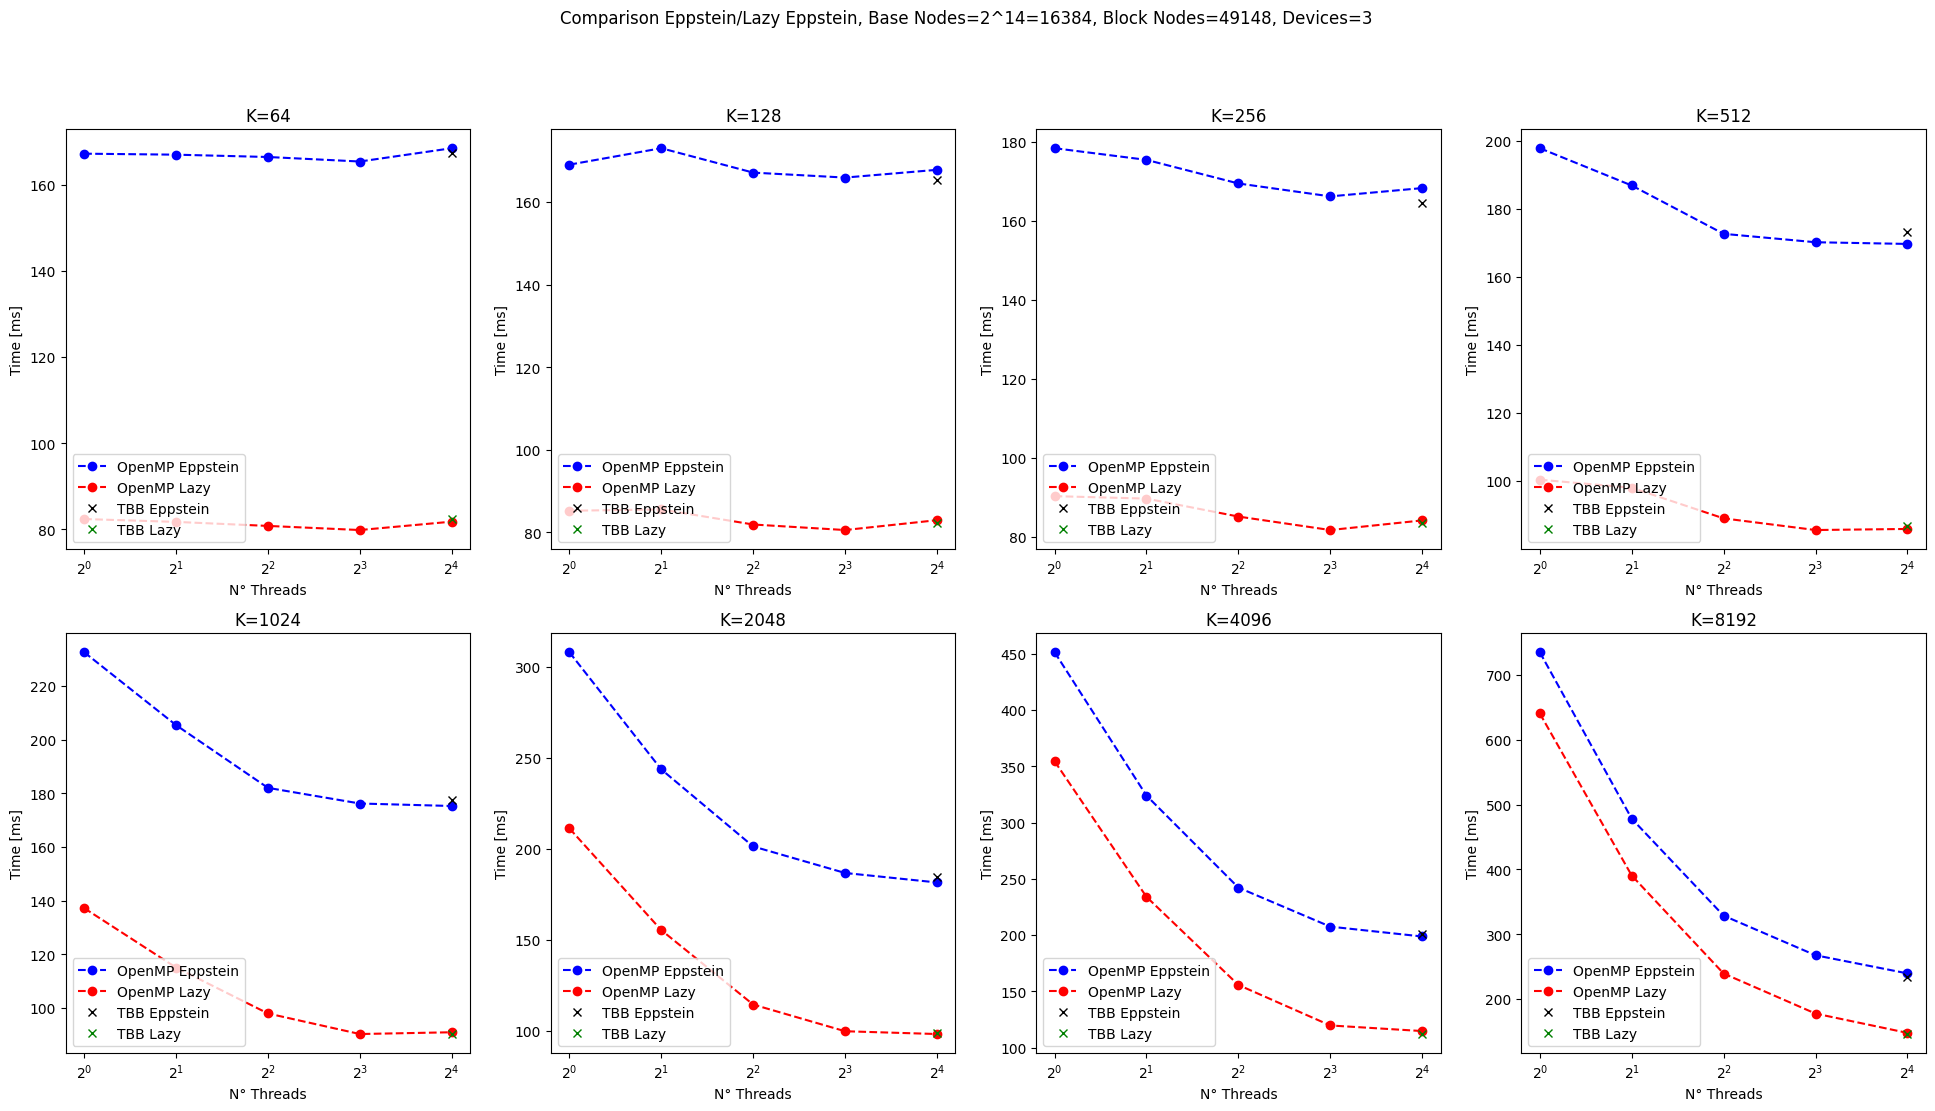

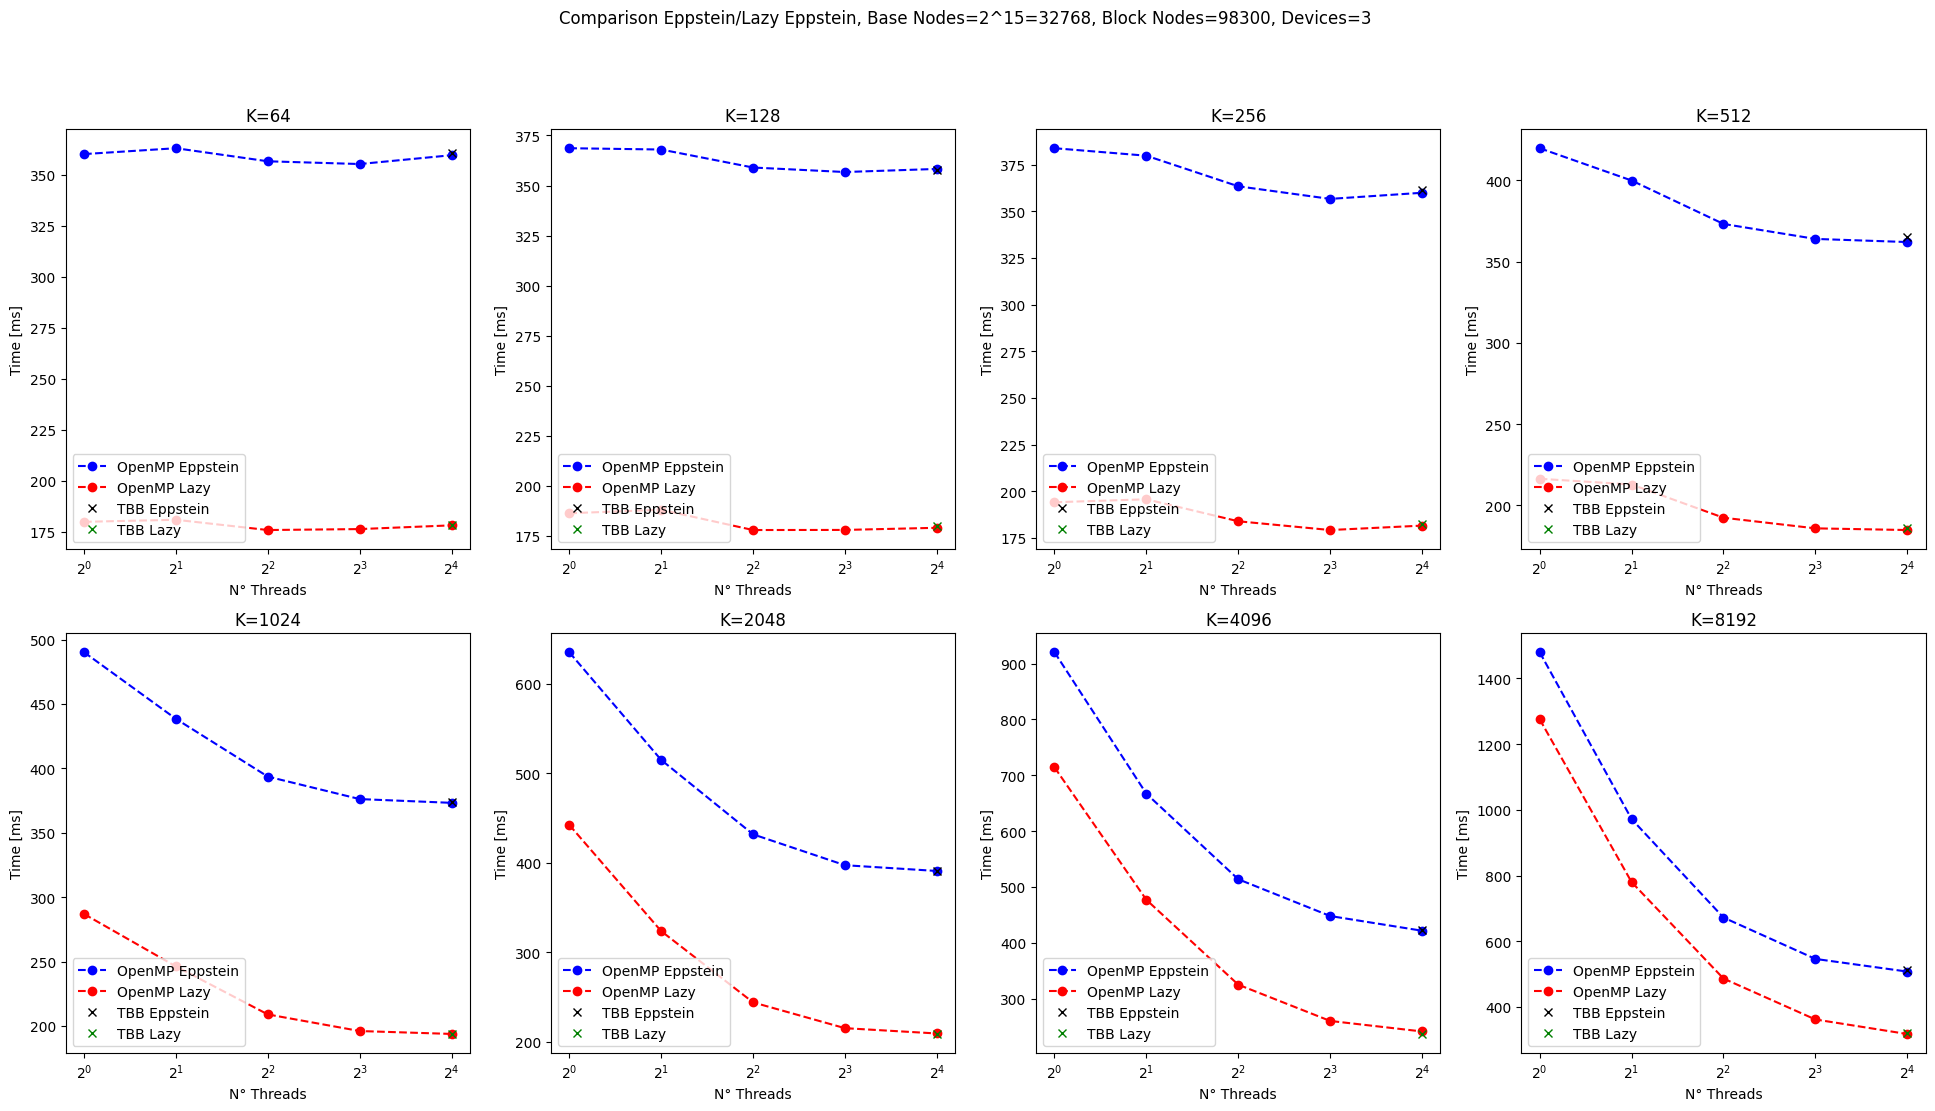

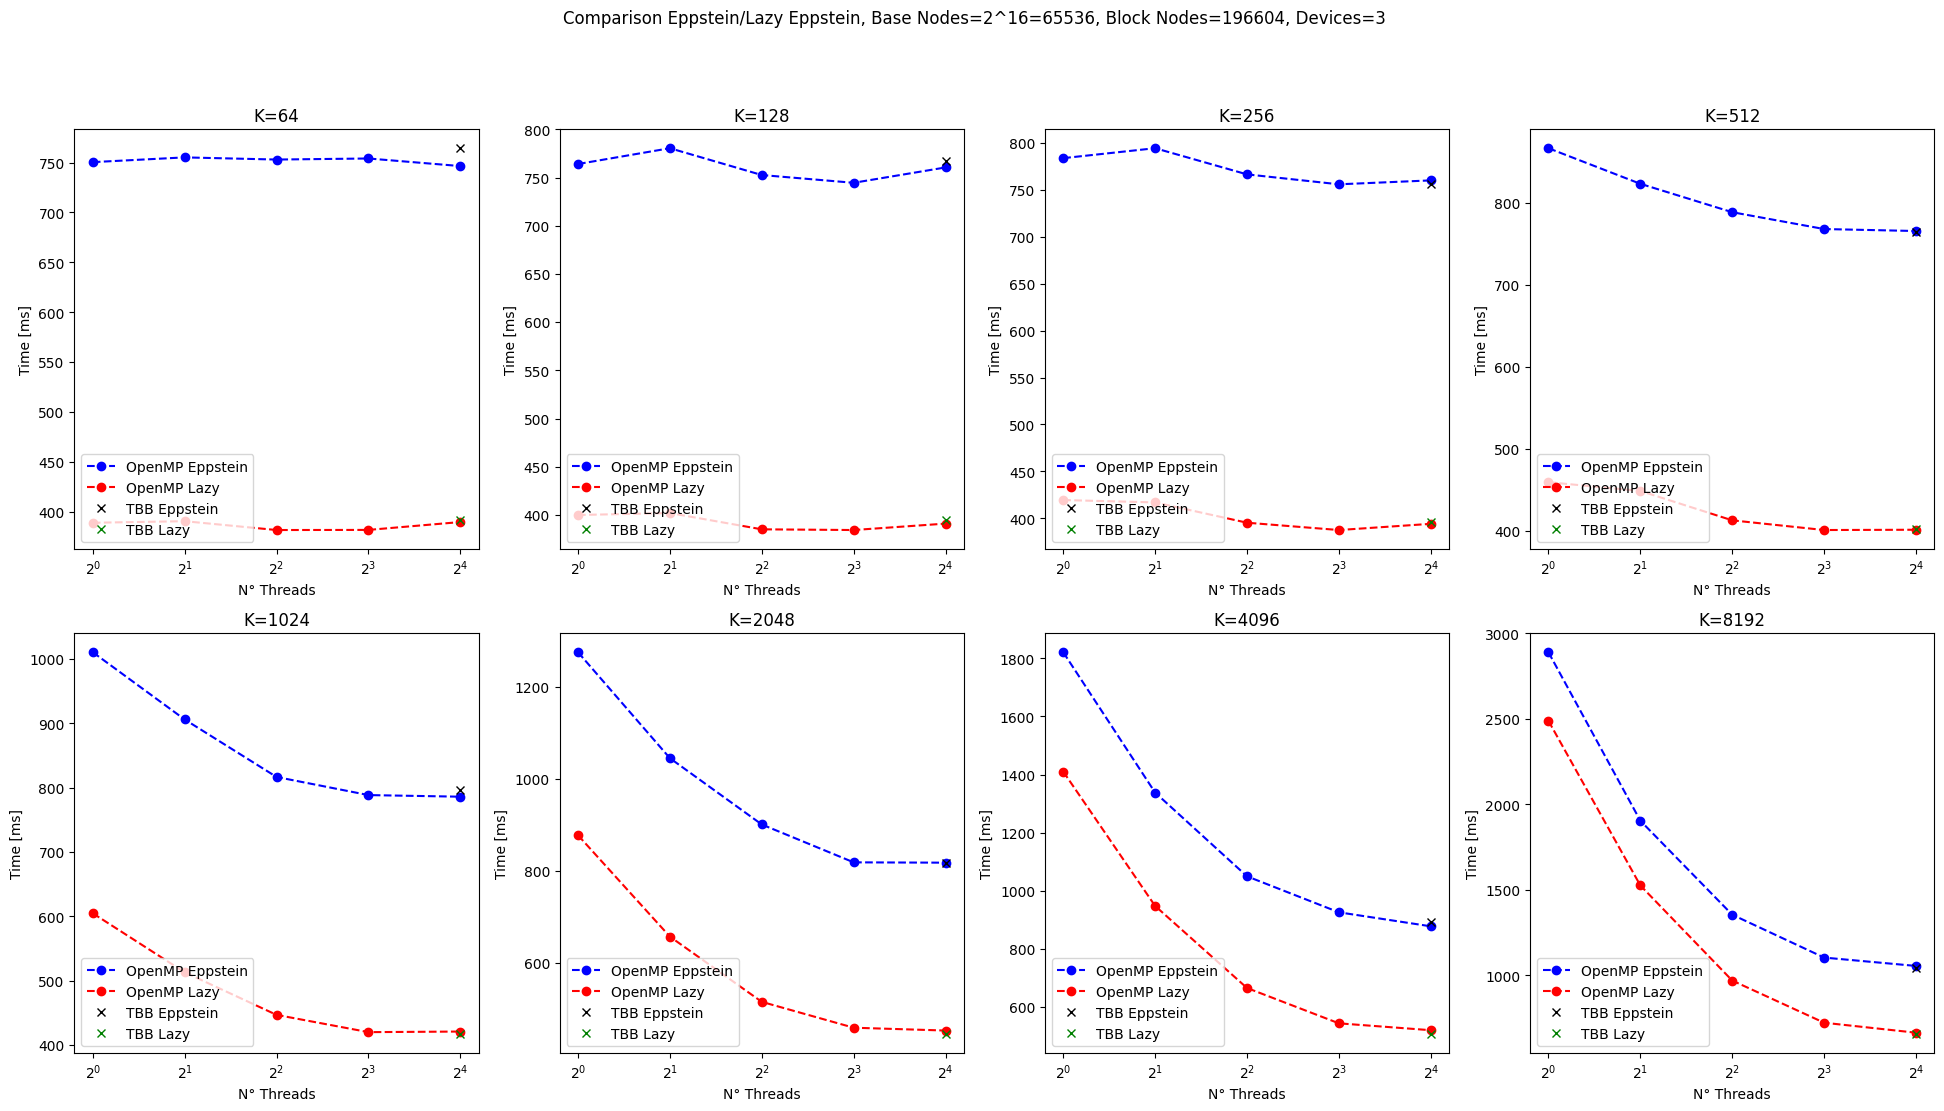

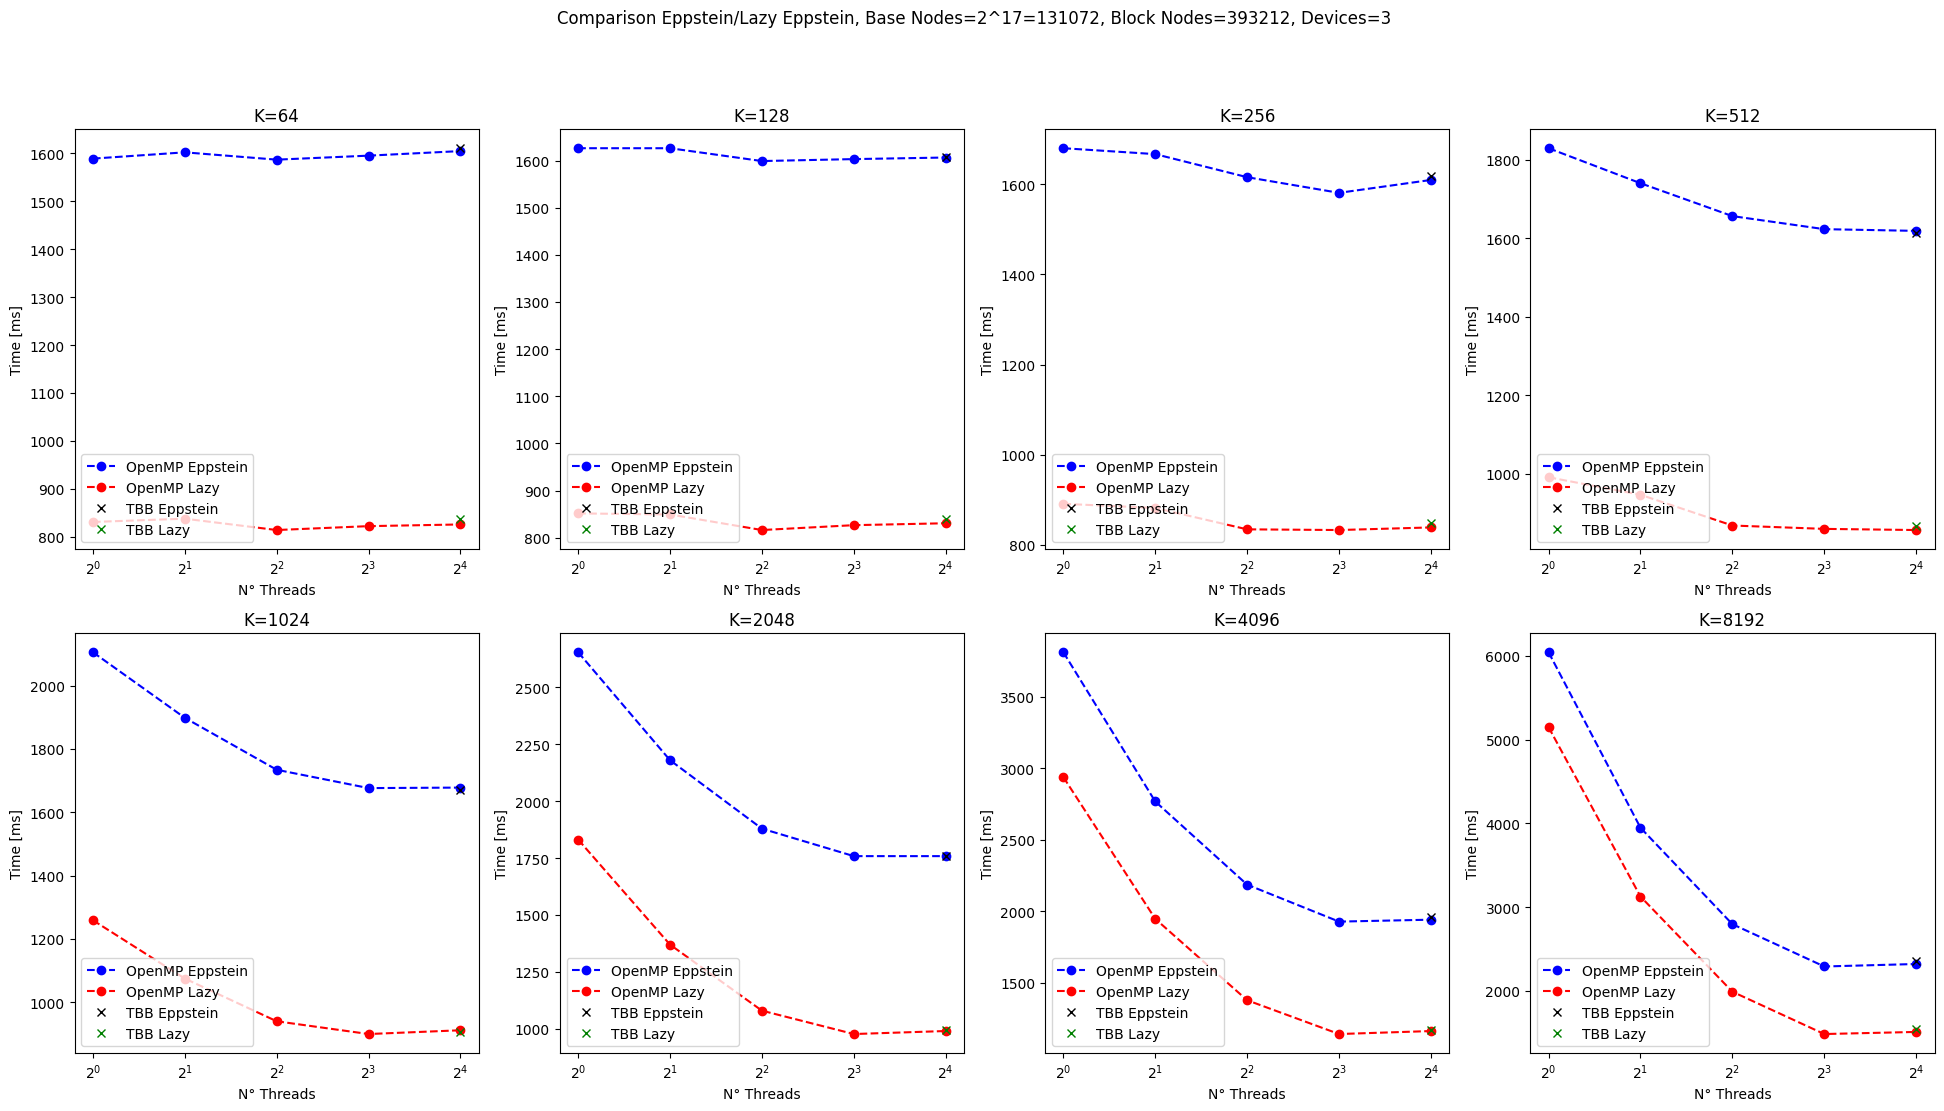

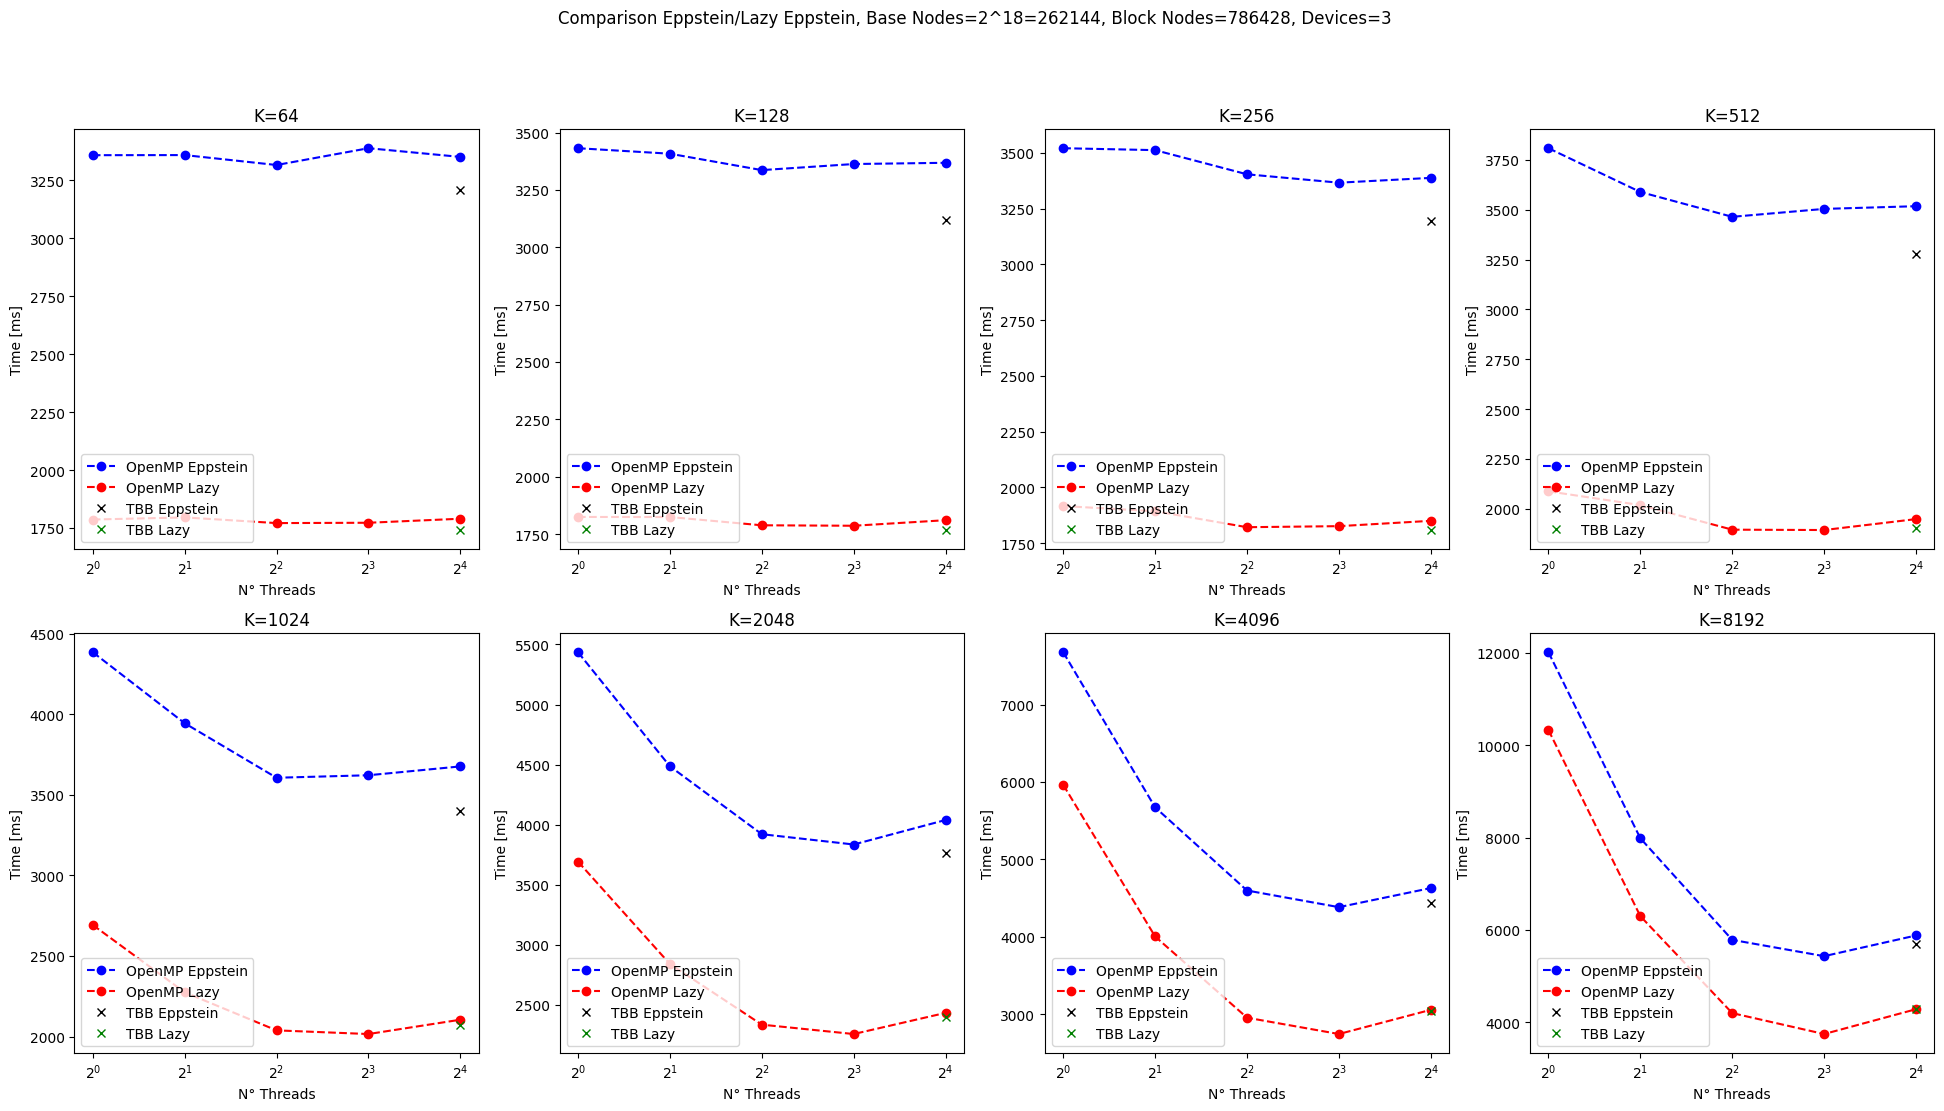

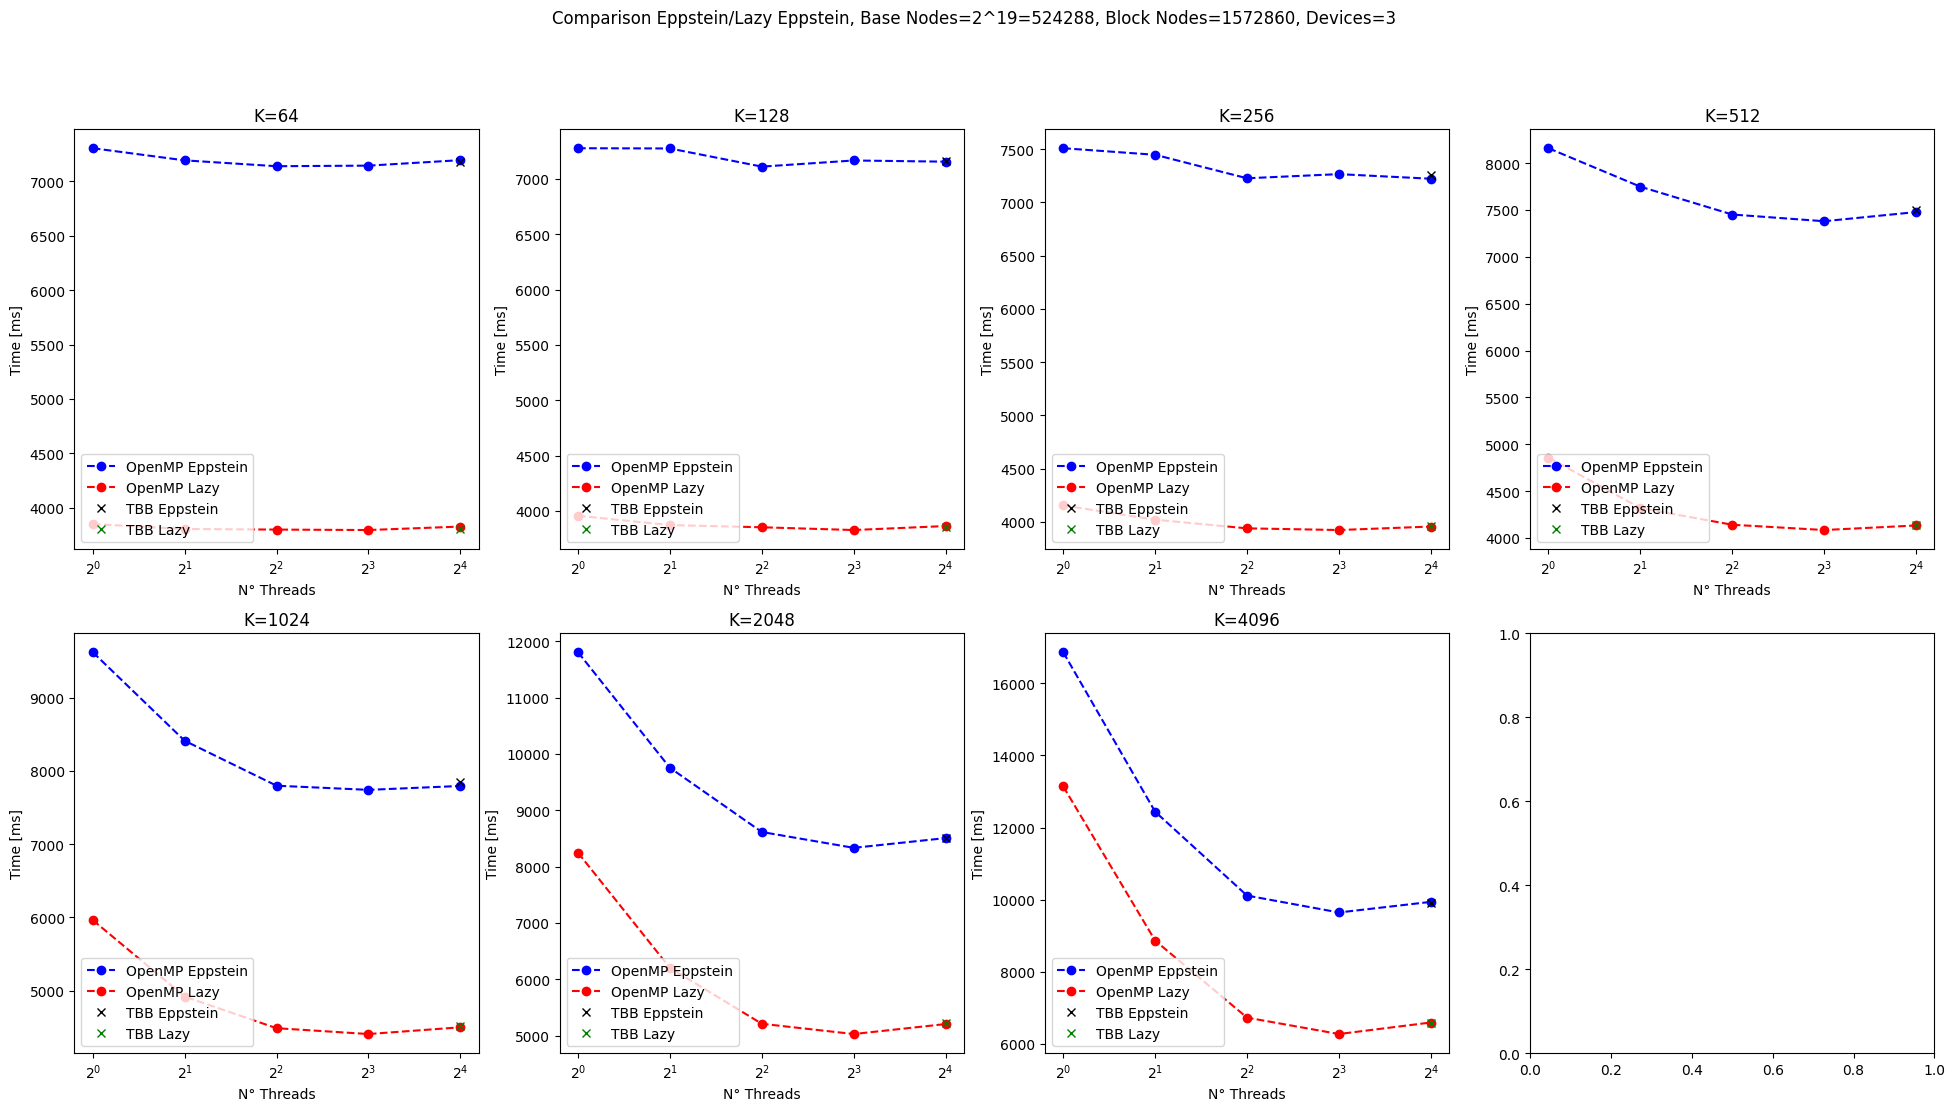

In [11]:
for i in range(13):
    fix, axs = plt.subplots(2, 4, figsize=(24, 12))

    fix.suptitle('Comparison Eppstein/Lazy Eppstein, Base Nodes=2^' + str(i+7) + '=' + str(pow(2,i+7)) + ", Block Nodes=" + str((pow(2,i+7)-2)*3+2) + ', Devices=3')

    for j, ax in enumerate(axs.flat):
        if i == 12 and j == 7:
            break

        ax.set_title('K=' + str(int(sequential_revision[j + (i+2)*8, 1])))

        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, j + (i+2)*8, 3), '--bo')
        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, j + (i+2)*8, 5), '--ro')
        ax.plot(16, tbb_revision[j + (i+2)*8, 3], 'kx')
        ax.plot(16, tbb_revision[j + (i+2)*8, 5], 'gx')

        ax.set_xlabel('N° Threads')
        ax.set_ylabel('Time [ms]') 

        ax.legend(['OpenMP Eppstein', 'OpenMP Lazy', 'TBB Eppstein', 'TBB Lazy'], loc='lower left')
        ax.set_xscale('log', base=2)

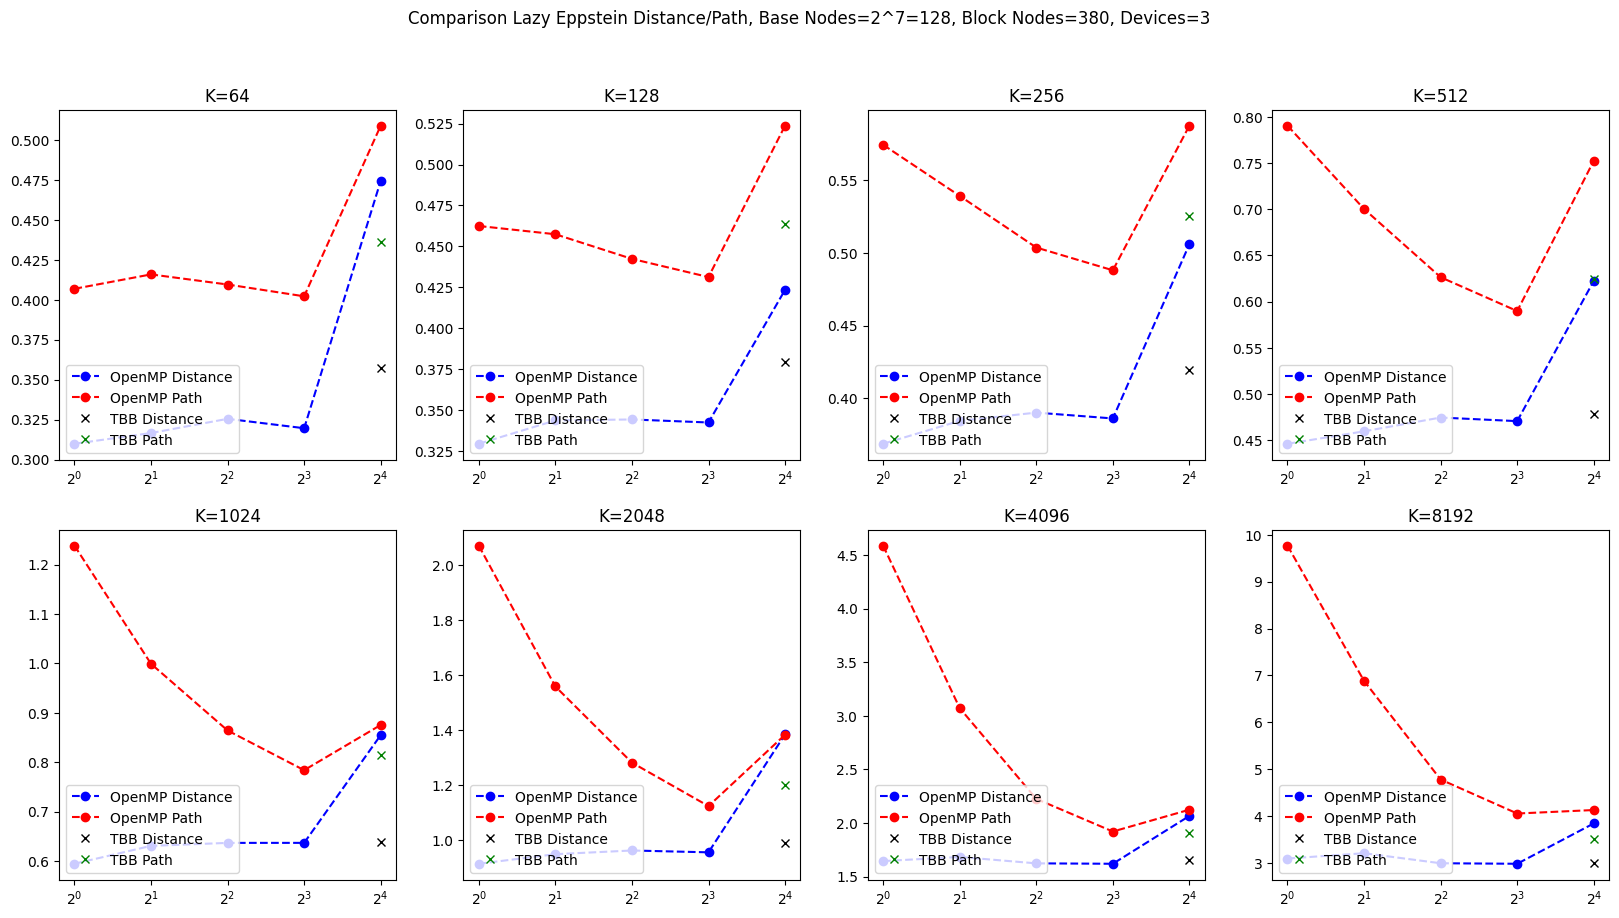

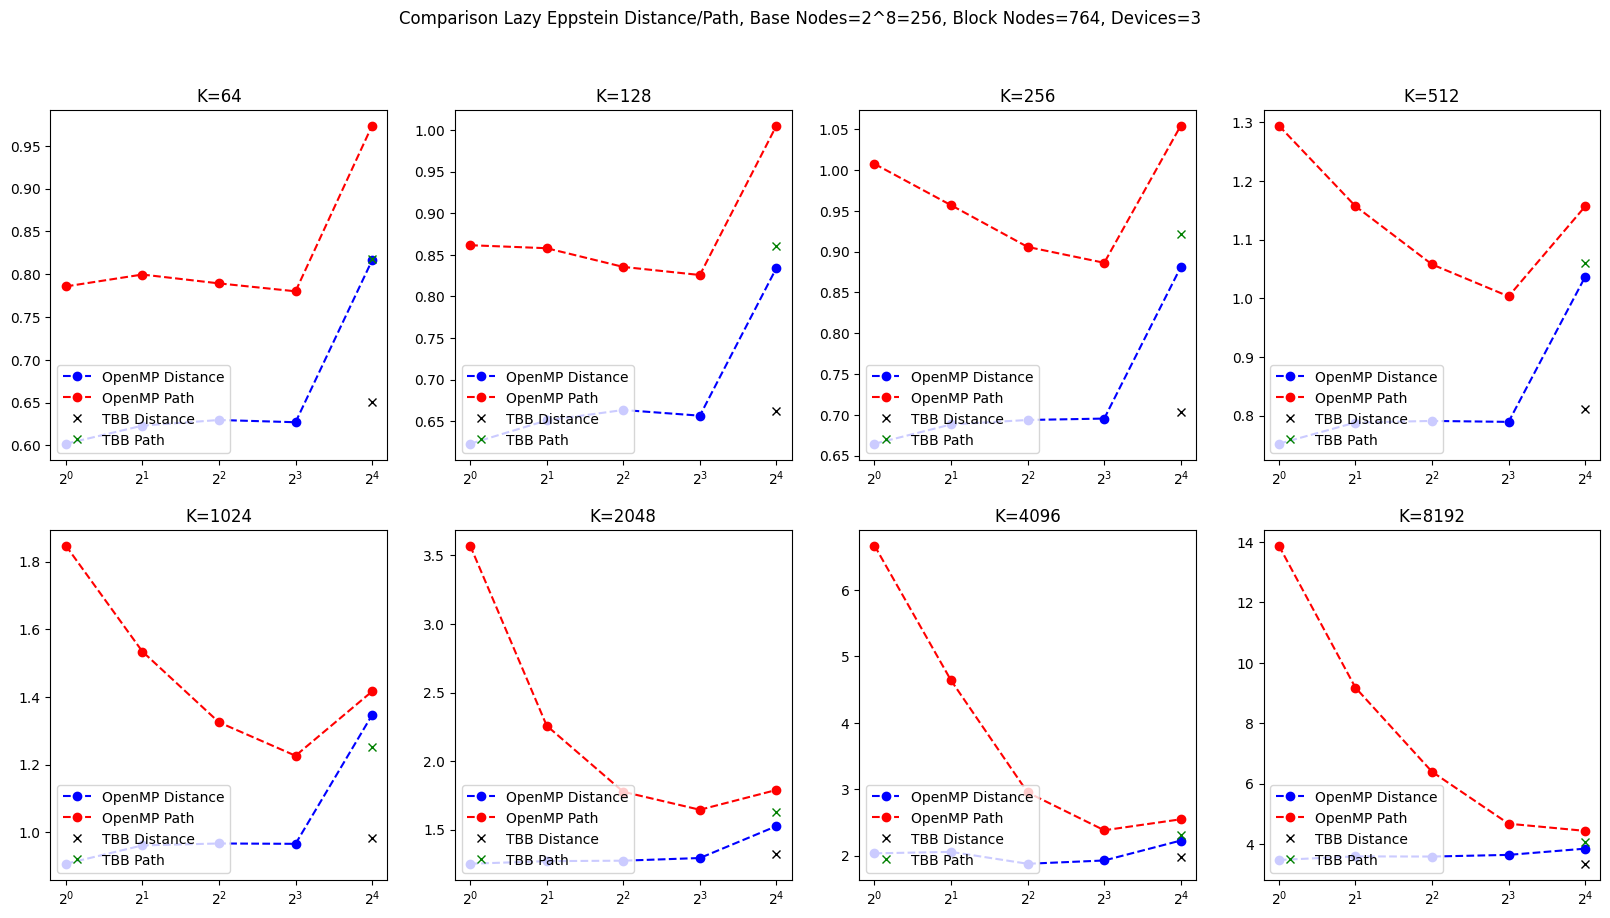

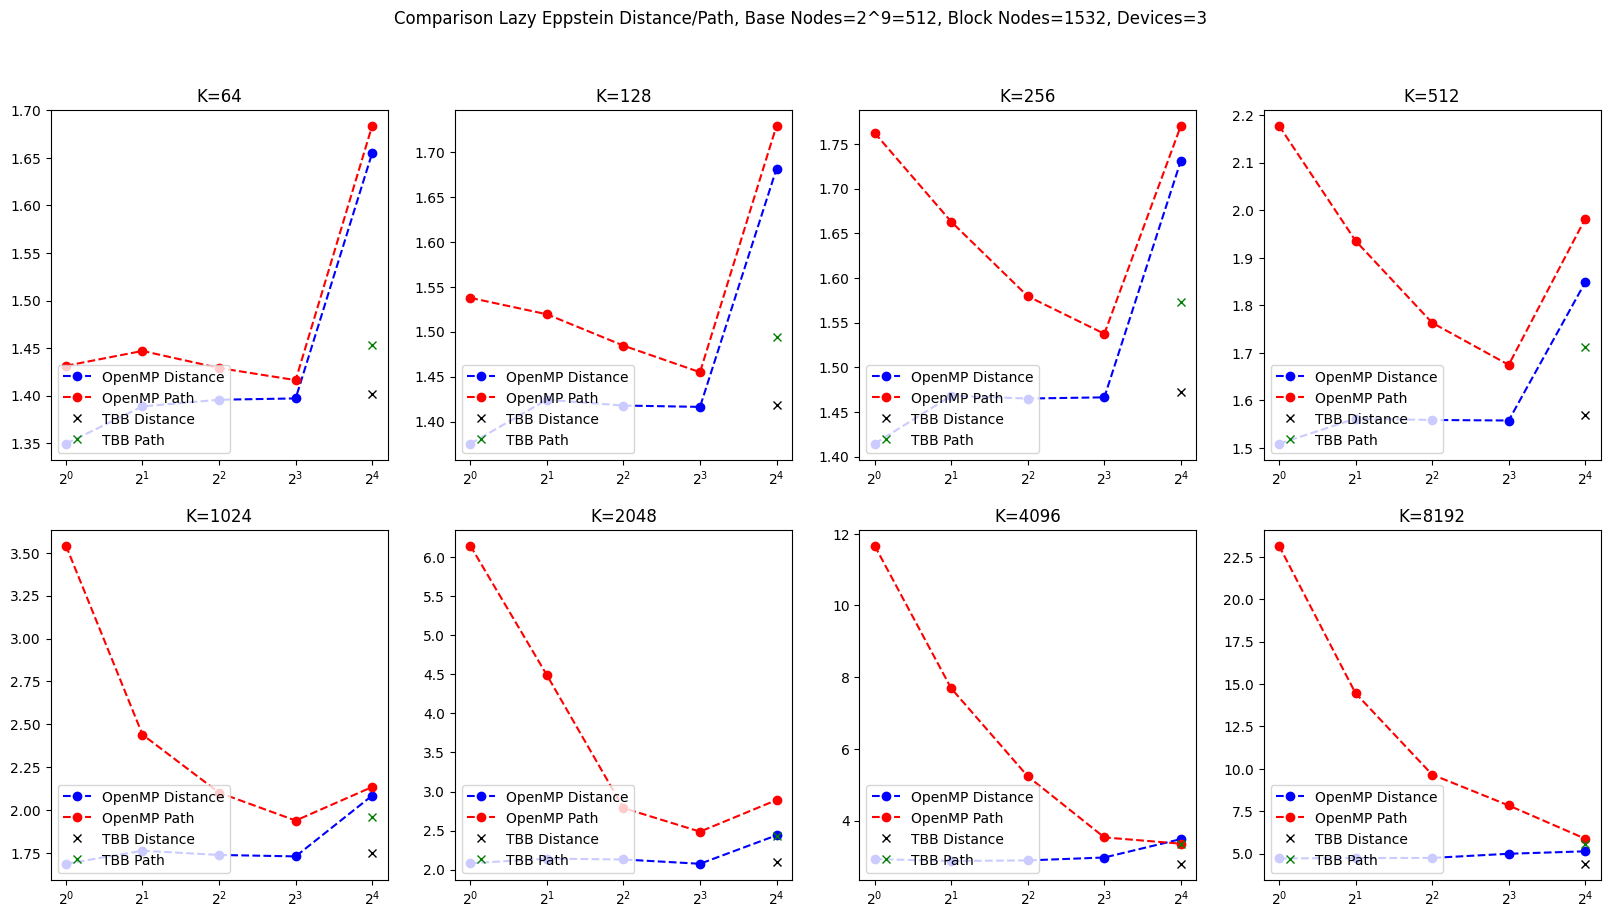

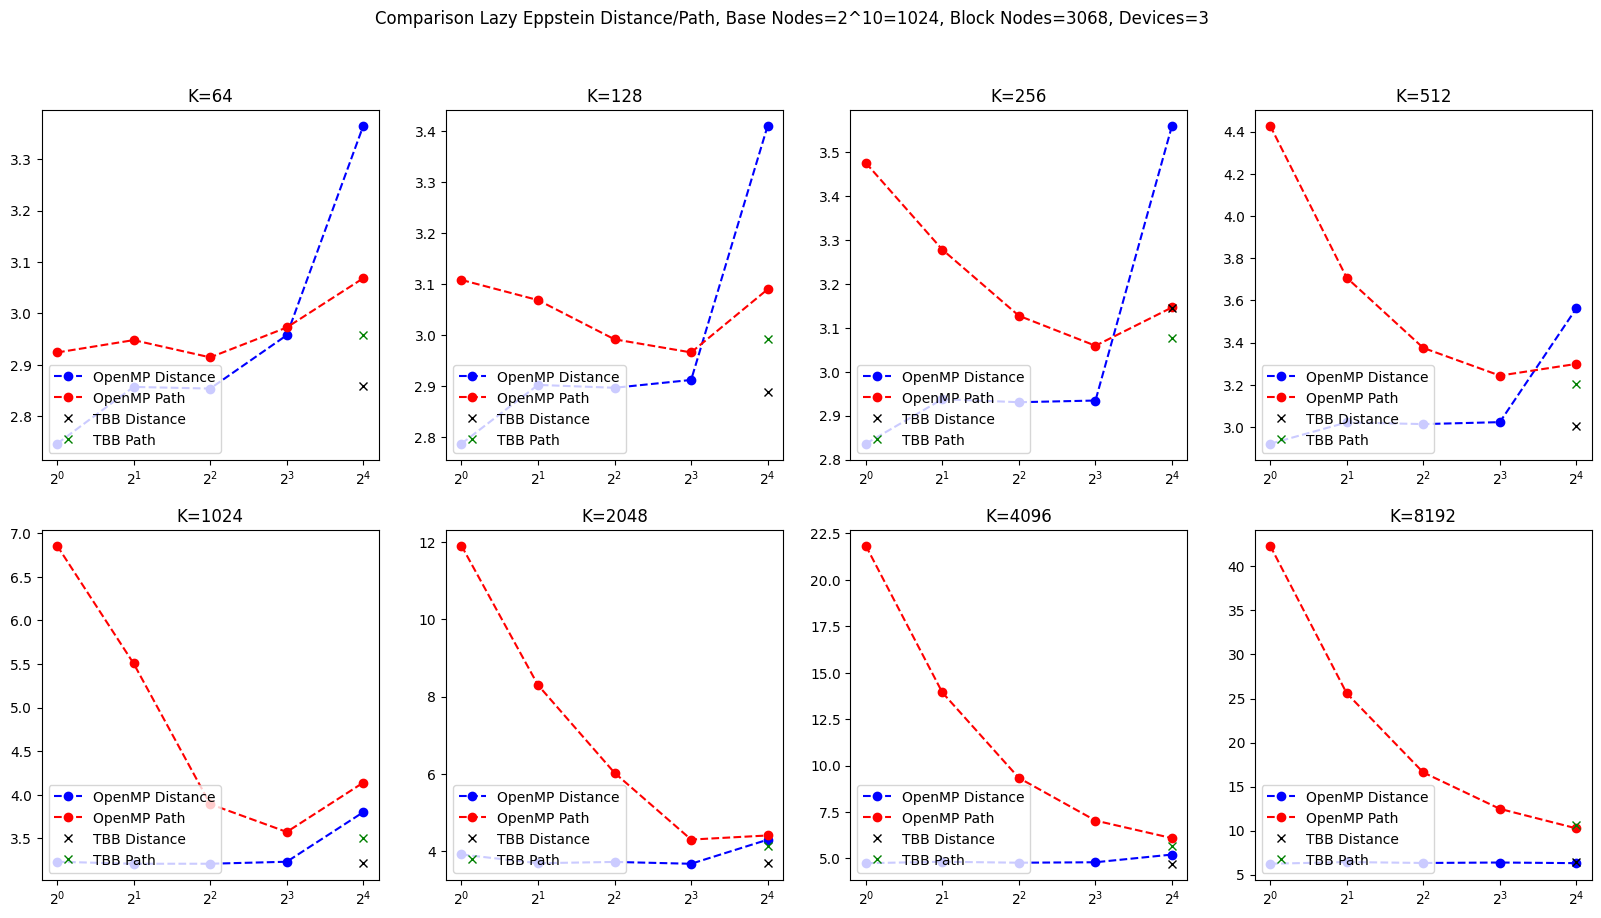

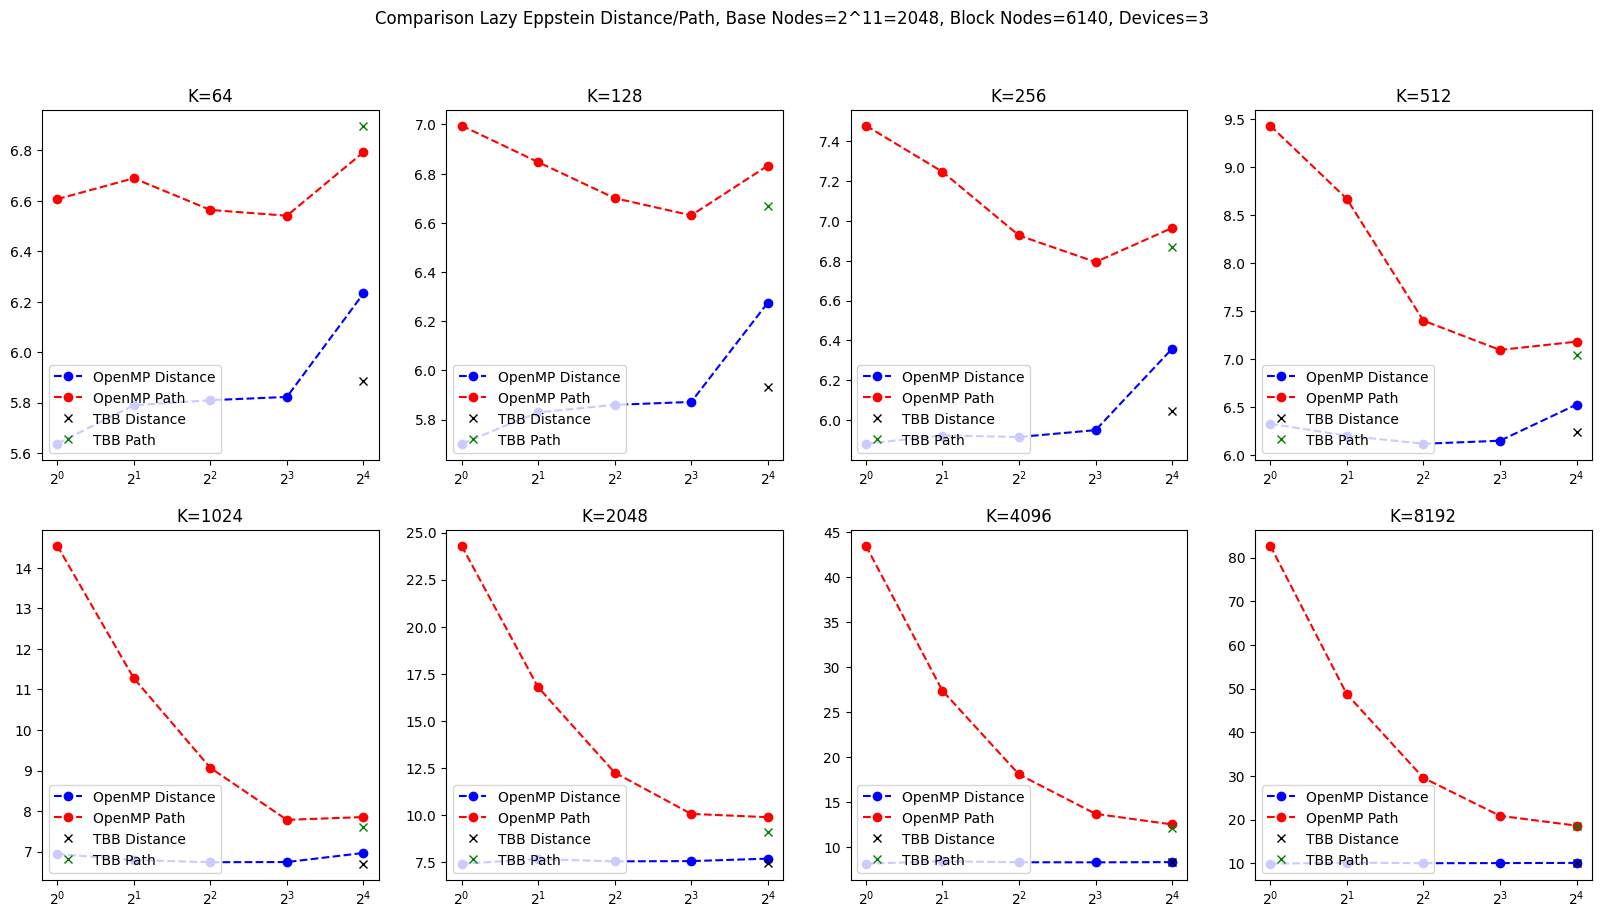

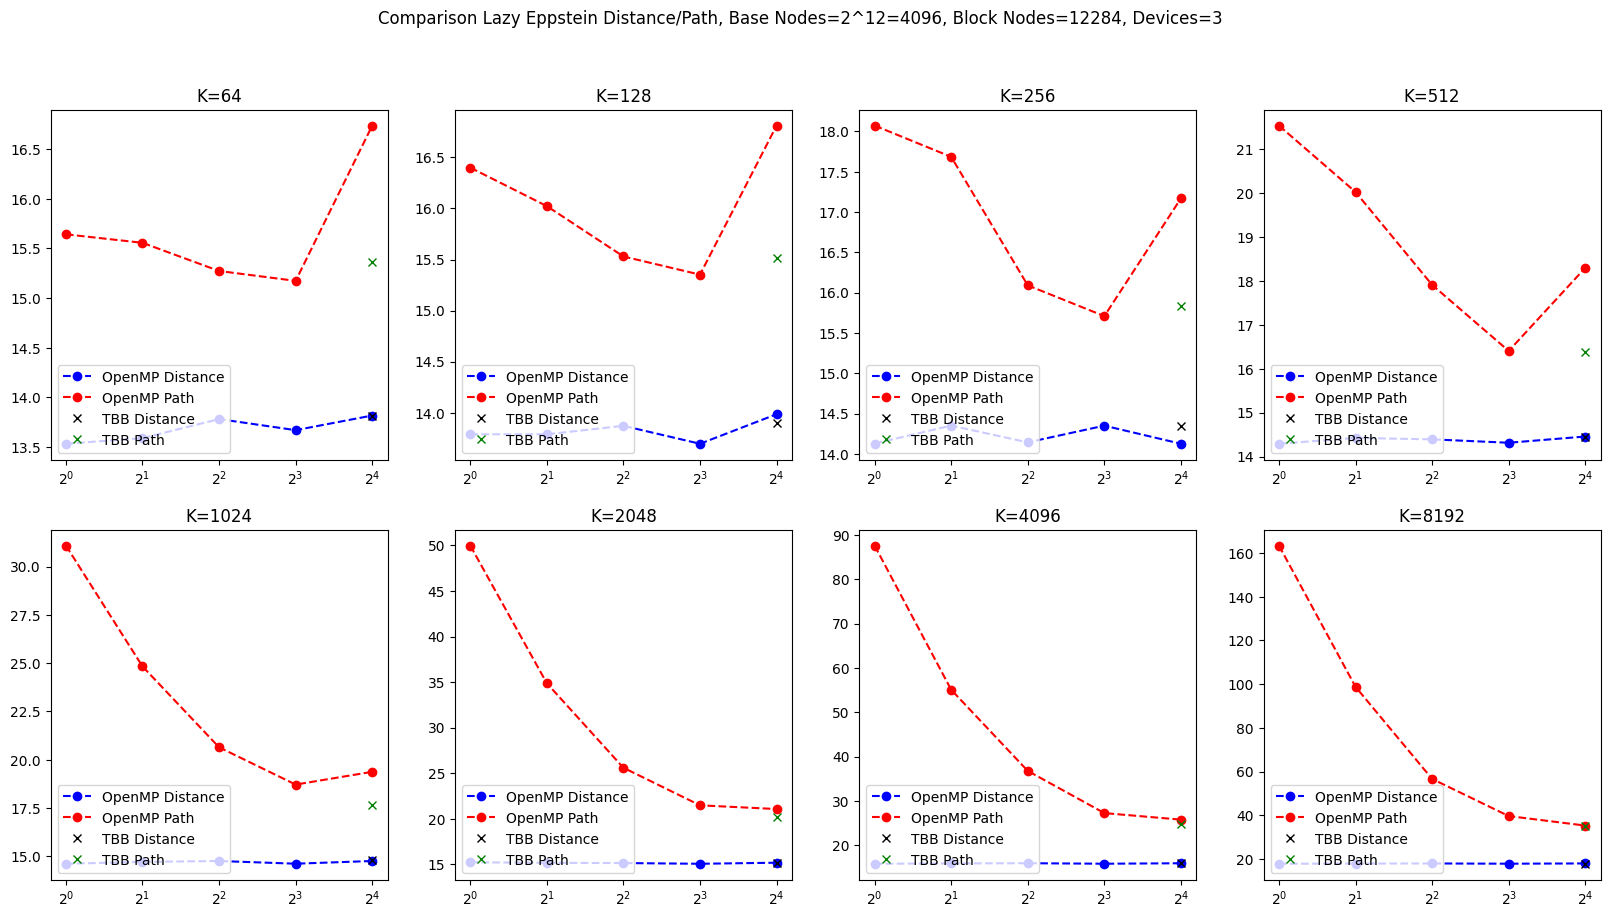

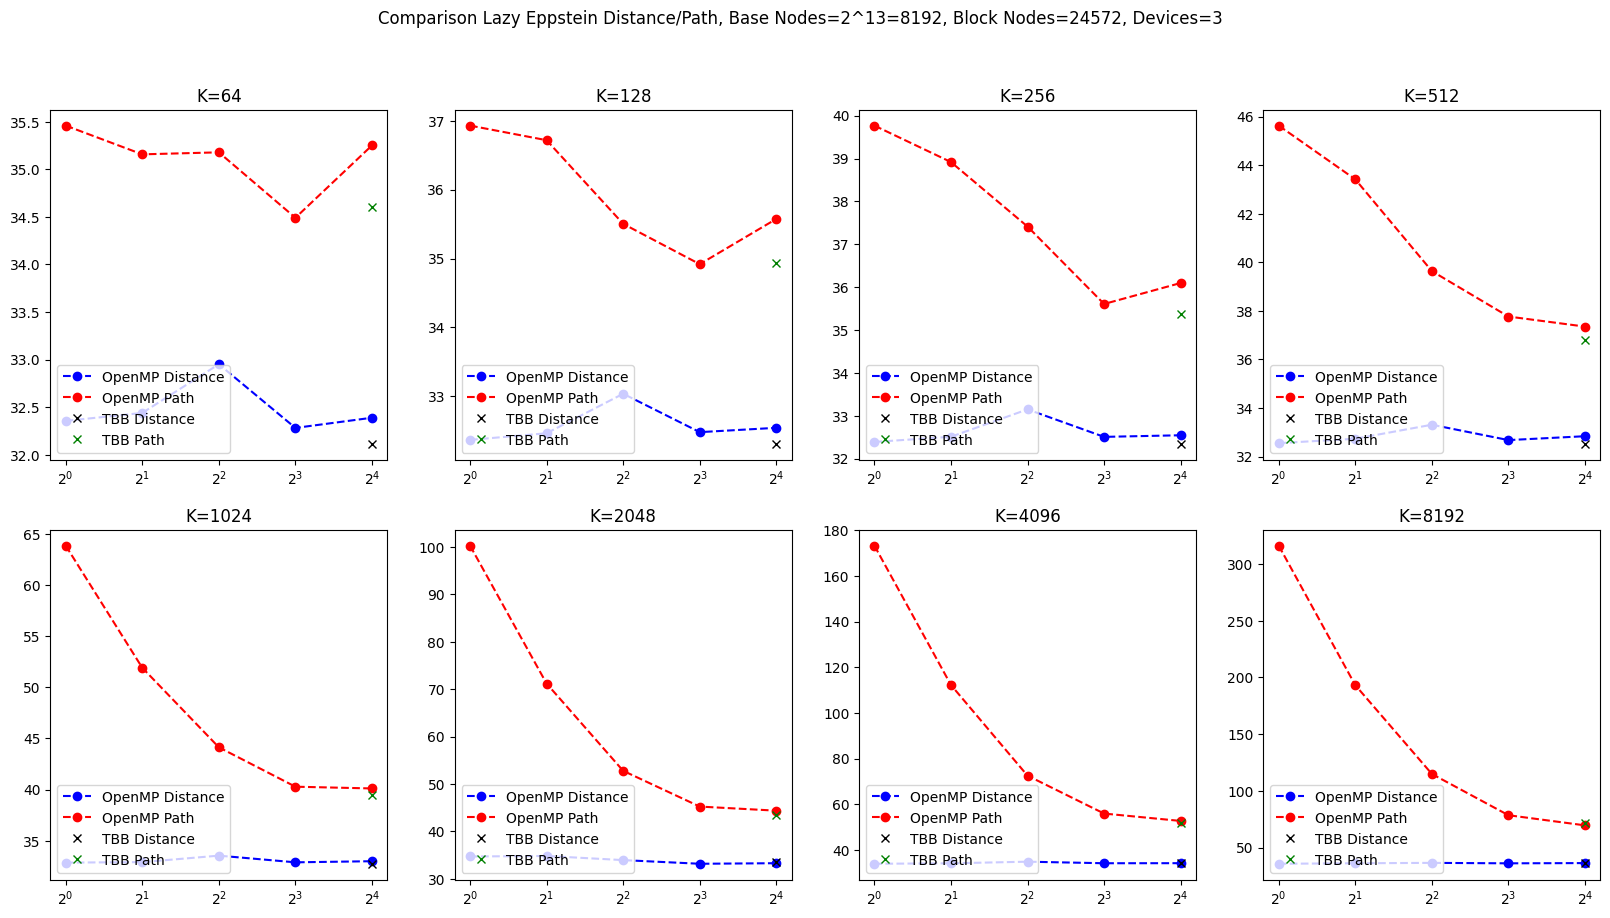

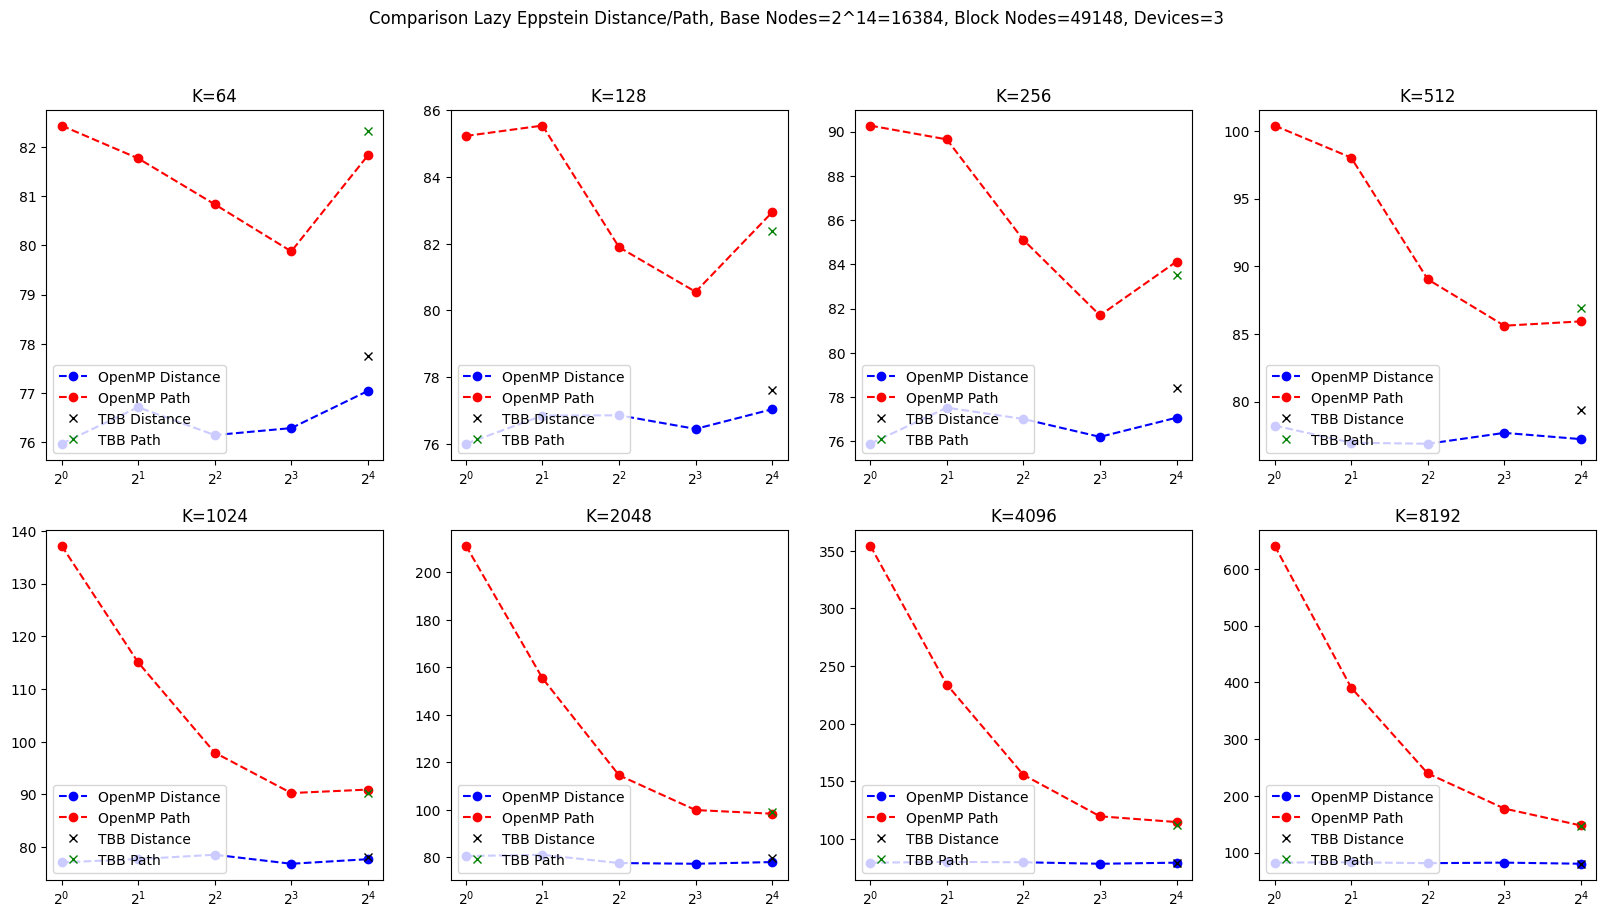

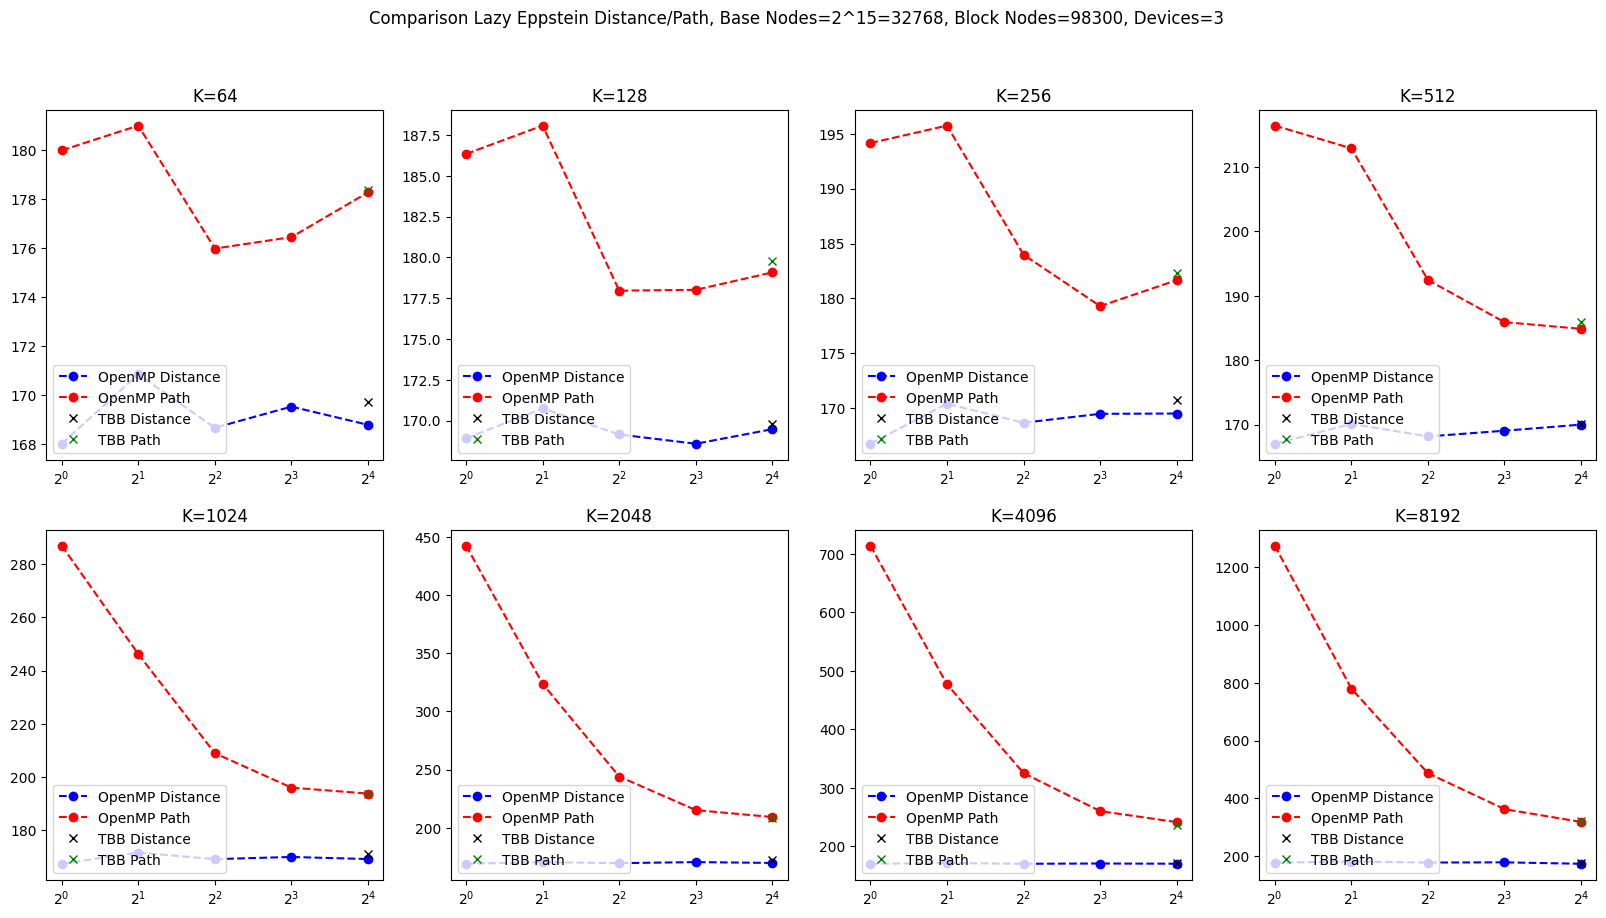

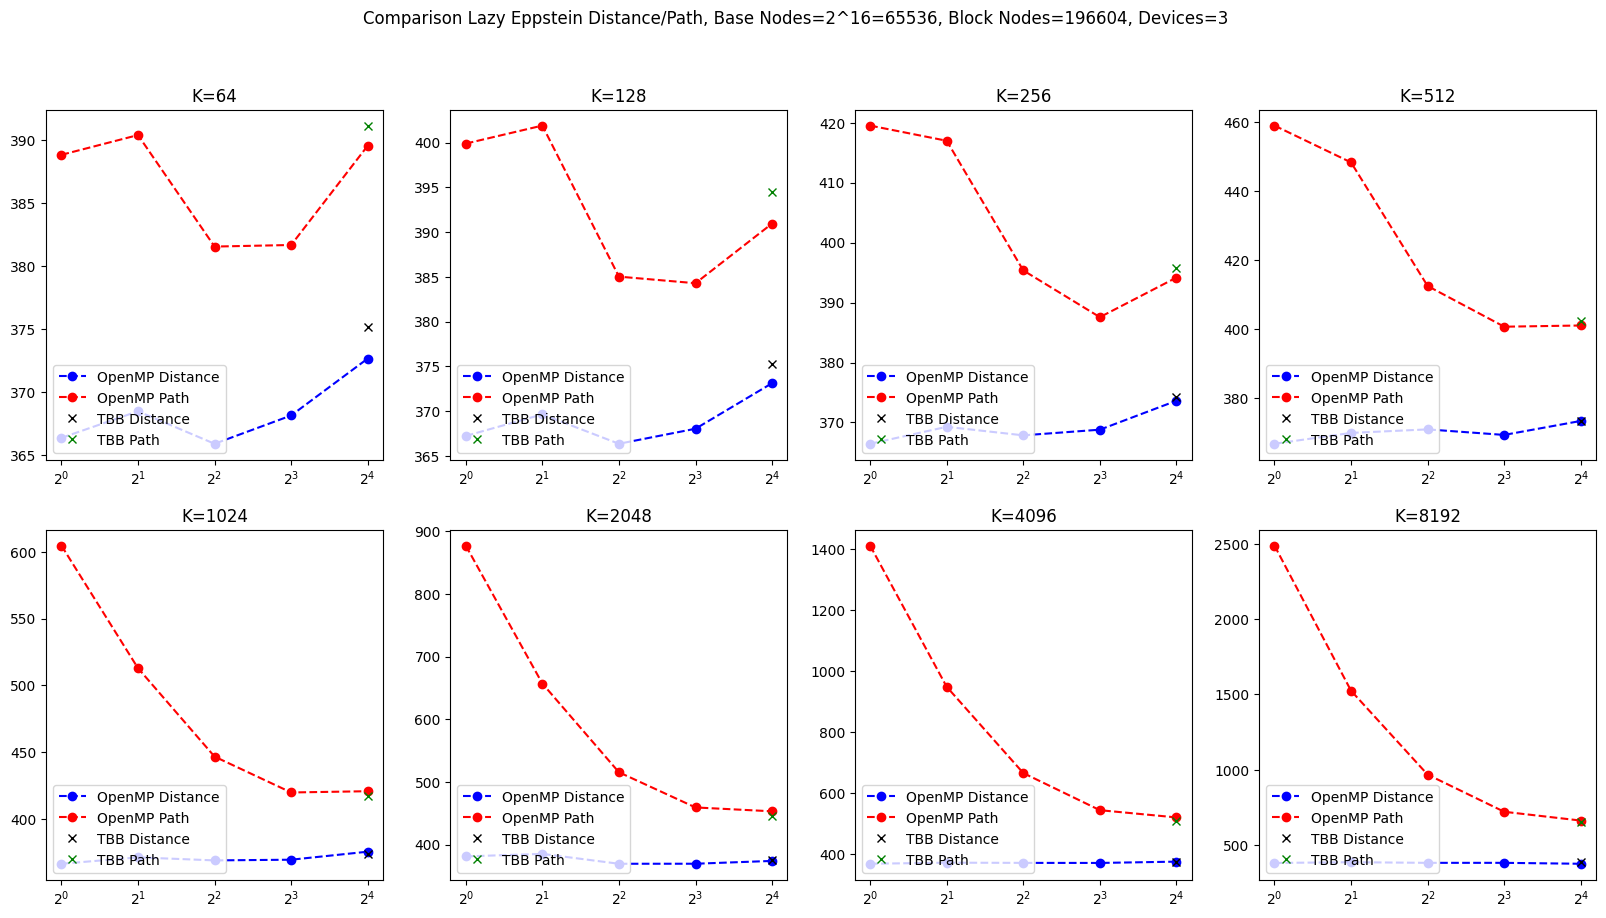

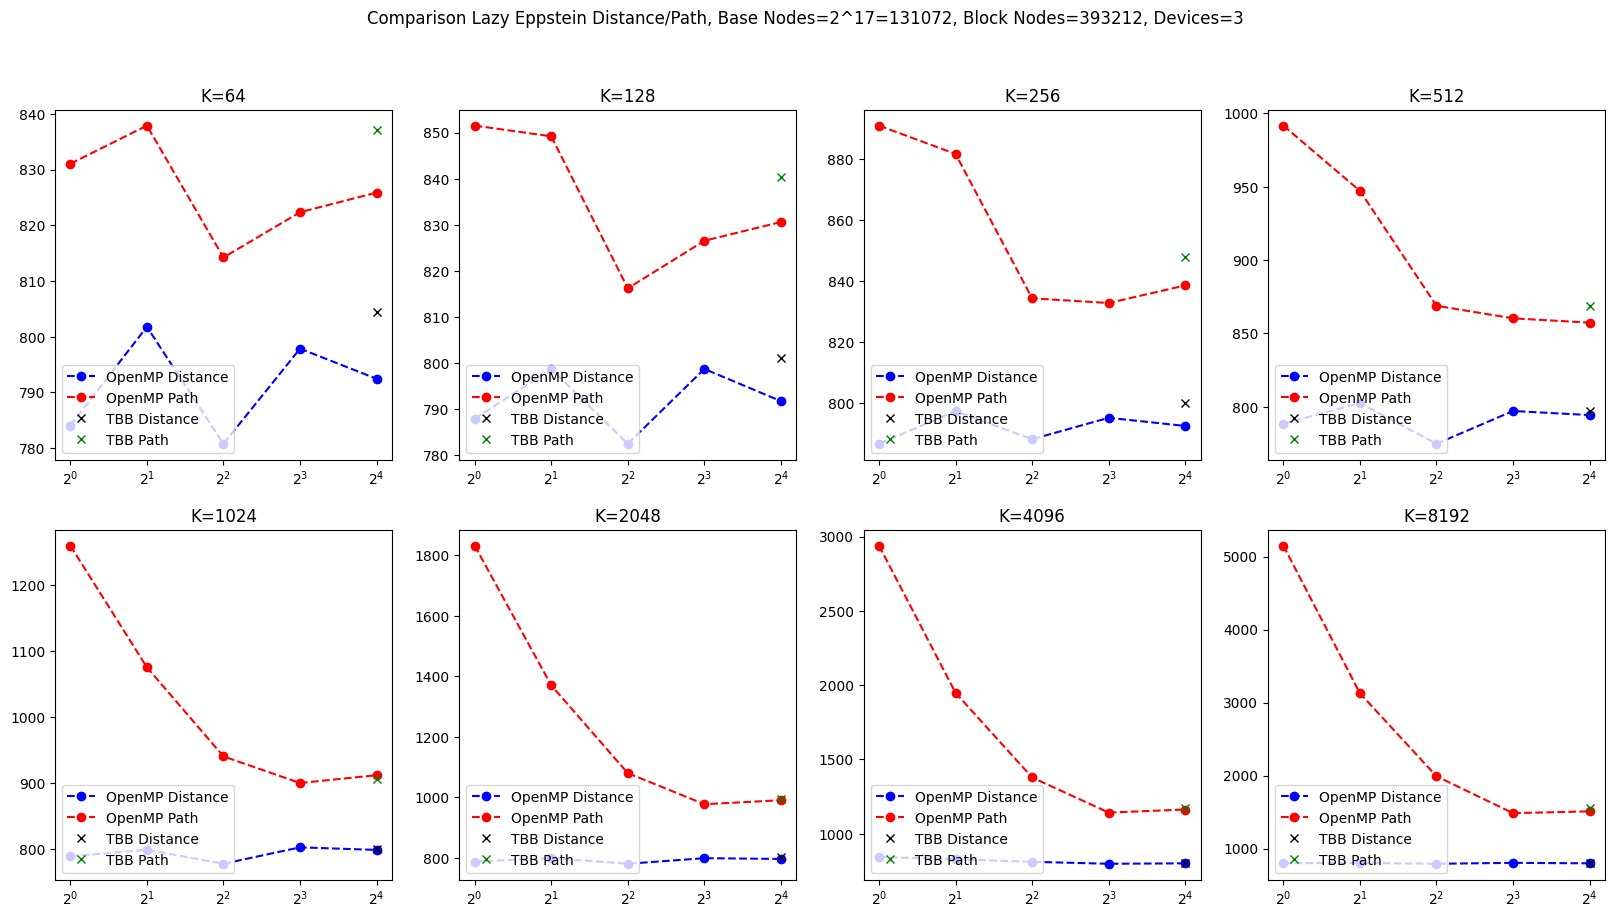

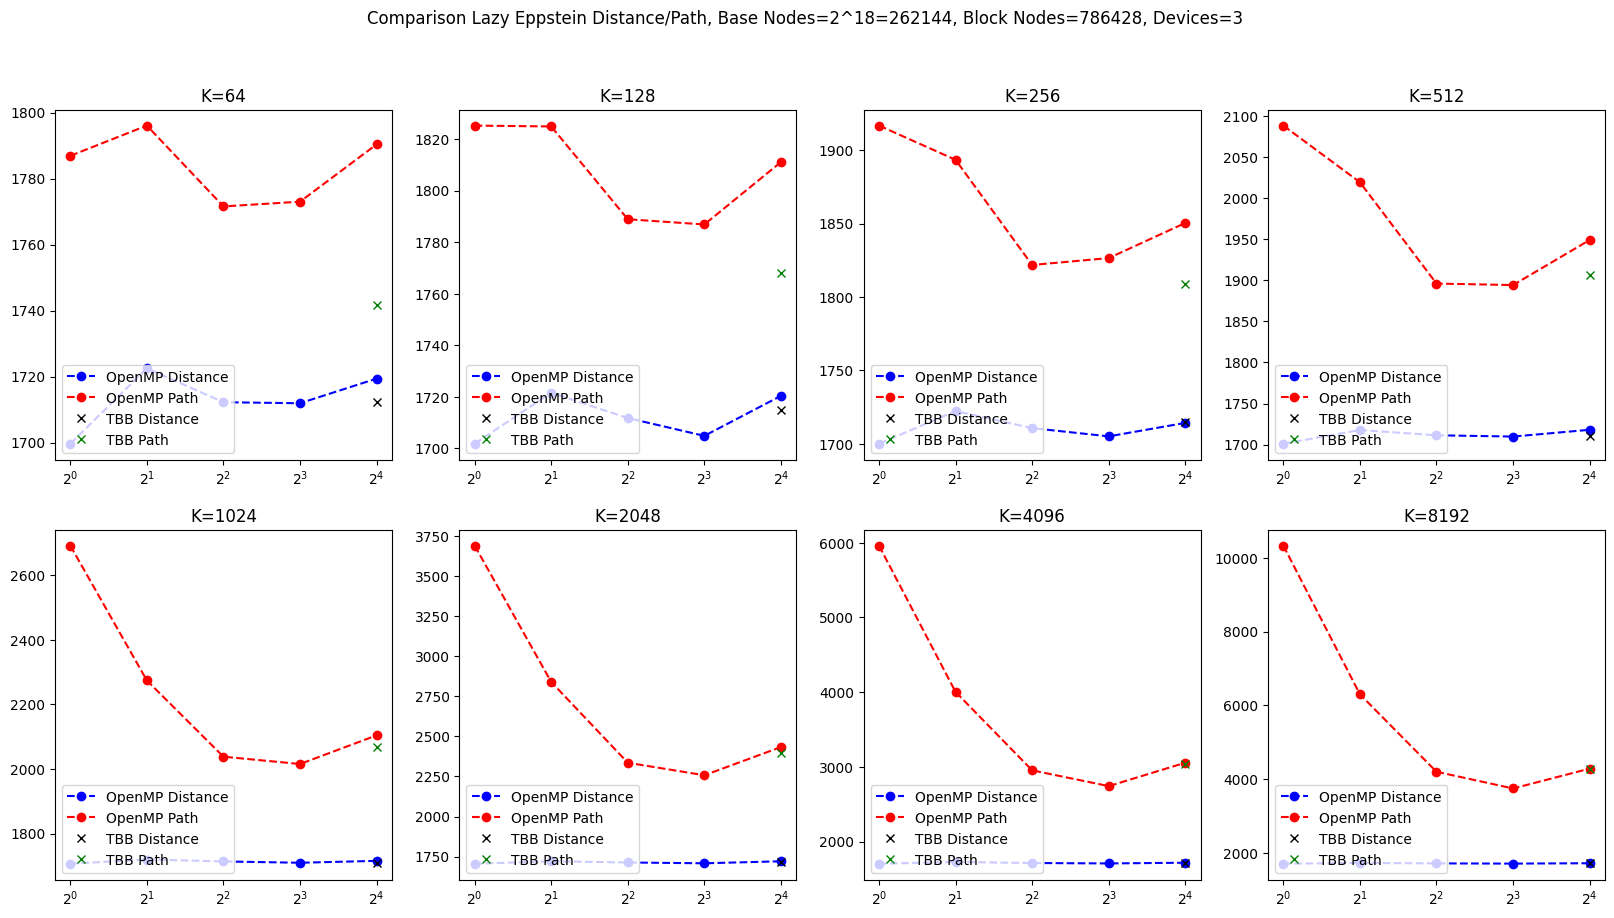

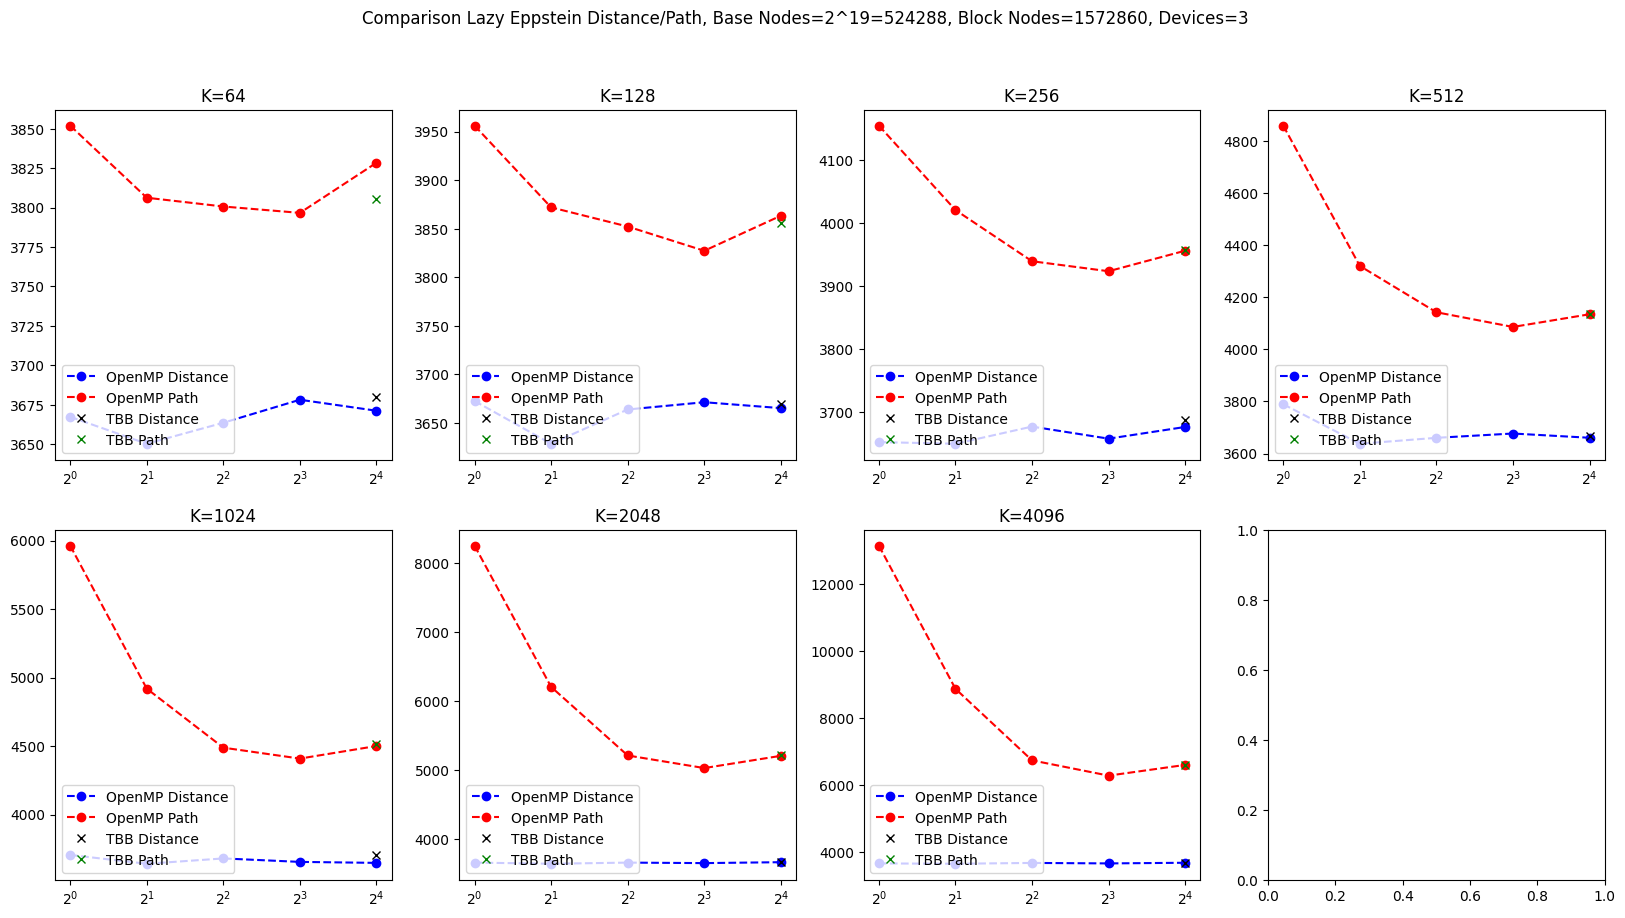

In [12]:
for i in range(13):
    fix, axs = plt.subplots(2, 4, figsize=(20, 10))

    fix.suptitle('Comparison Lazy Eppstein Distance/Path, Base Nodes=2^' + str(i+7) + '=' + str(pow(2,i+7)) + ", Block Nodes=" + str((pow(2,i+7)-2)*3+2) + ', Devices=3')

    for j, ax in enumerate(axs.flat):
        if i == 12 and j == 7:
            break
        
        ax.set_title('K=' + str(int(sequential_revision[j + (i+2)*8, 1])))

        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, j + (i+2)*8, 4), '--bo')
        ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, j + (i+2)*8, 5), '--ro')
        ax.plot(16, tbb_revision[j + (i+2)*8, 4], 'kx')
        ax.plot(16, tbb_revision[j + (i+2)*8, 5], 'gx')

        ax.legend(['OpenMP Distance', 'OpenMP Path', 'TBB Distance', 'TBB Path'], loc='lower left')
        ax.set_xscale('log', base=2)